## MARKET BASKET ANALYSIS 

#### Step 1: Import Libraries and Read the Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
barcodes_df = pd.read_excel(r"D:\Alisha MS materials\decision theory analytics assignment\barcodesdata.xlsx")
barcodes_df

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1
...,...,...,...,...,...
9317,520138602854,10,12,281,1
9318,871811442797,10,12,285,1
9319,871811456399,10,12,287,2
9320,520134749024,10,12,283,1


In [4]:
loyalty_df = pd.read_excel(r"D:\Alisha MS materials\decision theory analytics assignment\loyaltydata.xlsx")
loyalty_df

,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0
1,9164011076155,72.0,Female,NaN,2.0,0.0
2,9162001049684,60.0,Female,NaN,1.0,0.0
3,9162005608405,NaN,Female,Married,5.0,NaN
4,9163002257856,50.0,Female,NaN,1.0,0.0
...,...,...,...,...,...,...
191124,9160000248237,75.0,Male,Married,1.0,0.0
191125,9162008409016,49.0,Female,Married,4.0,2.0
191126,9164011002963,NaN,NaN,NaN,NaN,0.0
191127,9161003772316,NaN,Female,NaN,1.0,0.0


In [5]:
pos_df = pd.read_excel(r"D:\Alisha MS materials\decision theory analytics assignment\posdata.xlsx")
pos_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12
...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12
235472,1099519315,41368,520423915759,2,3.180015,NaN


In [6]:
product_taxonomy_df = pd.read_excel(r"D:\Alisha MS materials\decision theory analytics assignment\productTaxonomy.xlsx")
product_taxonomy_df

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea
...,...,...,...,...,...,...,...
698,90,91,telephone,911,AIR TIME WIND,1,AIR TIME WIND
699,90,91,telephone,912,AIR TIME COSMOTE,1,AIR TIME COSMOTE
700,90,91,telephone,913,AIR TIME Q,1,AIR TIME Q
701,90,91,telephone,916,AIR TIME OTENET,1,AIR TIME OTENET


#### step 2 : check for nulls and missing values :--

In [9]:
barcodes_df.isnull().sum()[barcodes_df.isnull().sum()>0] # no nulls in barcode_df

Series([], dtype: int64)

In [10]:
loyalty_df.isnull().sum()[loyalty_df.isnull().sum()>0]

Age               80976
Gender            18934
MaritalStatus    153385
HouseholdSize     19095
Children          19678
dtype: int64

In [11]:
loyalty_df.isnull().sum()/loyalty_df.shape[0]*100

CardholderID      0.000000
Age              42.367197
Gender            9.906398
MaritalStatus    80.252081
HouseholdSize     9.990635
Children         10.295664
dtype: float64

In [12]:
pos_df.isnull().sum()[pos_df.isnull().sum()>0]

Card_ID    86888
dtype: int64

In [13]:
pos_df.isnull().sum()/pos_df.shape[0]*100

Basket_ID     0.000000
Date          0.000000
Barcode       0.000000
Sum_Units     0.000000
Sum_Value     0.000000
Card_ID      36.899191
dtype: float64

In [14]:
product_taxonomy_df.isnull().sum()[product_taxonomy_df.isnull().sum()>0] # no nulls 

Series([], dtype: int64)

#### step 3 :Take care of nulls :--

In [ ]:
# Fill missing 'Age' with the median value

In [15]:
median_age = loyalty_df['Age'].median()
loyalty_df['Age'].fillna(median_age,inplace=True)

In [16]:
# Sanity check :--
loyalty_df.isnull().sum()/loyalty_df.shape[0]*100

CardholderID      0.000000
Age               0.000000
Gender            9.906398
MaritalStatus    80.252081
HouseholdSize     9.990635
Children         10.295664
dtype: float64

In [ ]:
# Fill missing 'Gender' and 'MaritalStatus' with 'Unknown'

In [17]:
loyalty_df['Gender'].fillna('Unknown',inplace=True)
loyalty_df['MaritalStatus'].fillna('Unknown',inplace=True)

In [18]:
# Sanity check :--
loyalty_df.isnull().sum()/loyalty_df.shape[0]*100

CardholderID      0.000000
Age               0.000000
Gender            0.000000
MaritalStatus     0.000000
HouseholdSize     9.990635
Children         10.295664
dtype: float64

In [19]:
# Fill missing 'HouseholdSize' and 'Children' with 0 (assuming missing means not reported)
loyalty_df['HouseholdSize'].fillna(0, inplace=True)
loyalty_df['Children'].fillna(0, inplace=True)

In [20]:
# Sanity check :--
loyalty_df.isnull().sum()/loyalty_df.shape[0]*100

CardholderID     0.0
Age              0.0
Gender           0.0
MaritalStatus    0.0
HouseholdSize    0.0
Children         0.0
dtype: float64

In [ ]:
# Handling Missing Values in pos_df We will keep Card_ID as null to indicate non-loyalty card transactions.

In [27]:
loyalty_df['Age'][loyalty_df['Age']>100]

535    150.0
Name: Age, dtype: float64

In [28]:
# Remove ages greater than 120 as they are unrealistic
loyalty_df = loyalty_df[loyalty_df['Age'] <= 120]

####  Handle barcode dataset :--

In [32]:
####  Ensure all barcodes have 12 digits
barcodes_df = barcodes_df[barcodes_df['Barcode'].astype(str).str.len() == 12]
barcodes_df.shape

(9039, 5)

In [33]:
#Remove any duplicate barcodes
barcodes_df = barcodes_df.drop_duplicates(subset='Barcode', keep='first')
barcodes_df.shape

(9039, 5)

#### step 4 : EDA (Exploratory Data Analysis):--

In [ ]:
# Bar Chart of Gender
# Purpose: To show the count of male, female, and unknown genders.
# Inference: Highlights which gender is most represented

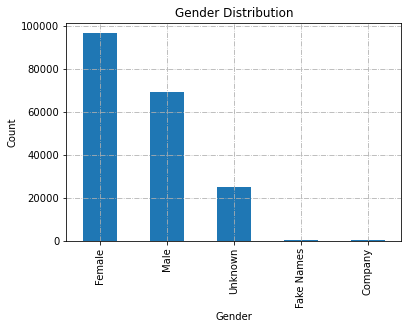

In [42]:
loyalty_df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(linestyle='-.');

In [43]:
# Conclusion: This bar chart shows that gender Female has the highest representation in the dataset

In [ ]:
# Histogram of Sum_Value
# Purpose: To check the distribution of transaction values.
# Inference: Shows common transaction value ranges

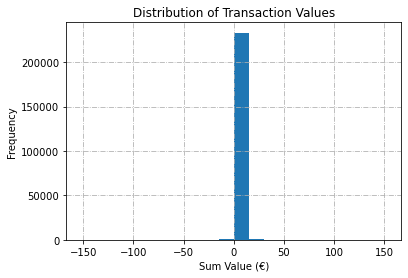

In [56]:
pos_df['Sum_Value'].plot(kind='hist', bins=20)
plt.title('Distribution of Transaction Values')
plt.xlabel('Sum Value (€)')
plt.grid(linestyle='-.');

In [ ]:
#Conclusion: This histogram shows which transaction value range occurs most frequently

In [ ]:
# From this graph, we can infer that the majority of transaction values are concentrated near zero,
# with very few transactions having a high or low value. This could indicate that most transactions have
# small total values, while extreme positive or negative transaction values are rare

In [ ]:
#Bar Chart of Top 10 Barcode Frequencies

In [ ]:
# Purpose: To show which products are sold most frequently.
# Inference: Helps identify popular products

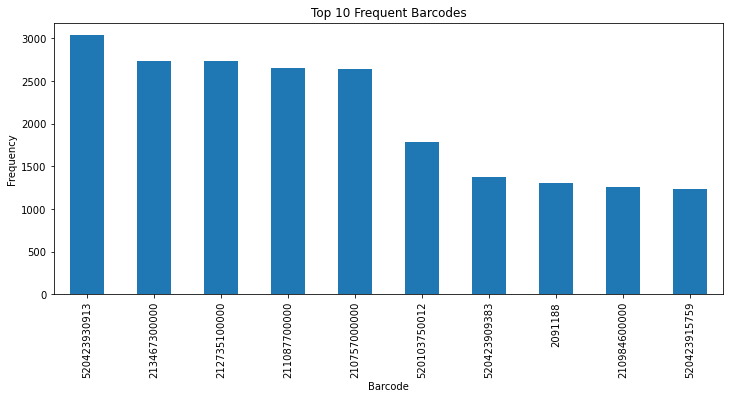

In [57]:
pos_df['Barcode'].value_counts().head(10).plot(kind='bar', title='Top 10 Frequent Barcodes', figsize=(12, 5))
plt.xlabel('Barcode')
plt.ylabel('Frequency')
plt.show()


#### Step 5: Data Integration :--

In [ ]:
# Lets Join POS Data with Barcodes Data: This step links the transaction data with product categories using the Barcode column.

In [65]:
# Join pos_df with barcodes_df using Barcode:-
# Merge POS data with barcodes data using the 'Barcode' column


pos_barcodes_df = pd.merge(pos_df, barcodes_df, on='Barcode', how='left')

In [66]:
print(pos_barcodes_df.head())

    Basket_ID   Date       Barcode  Sum_Units  Sum_Value       Card_ID  \
0  1103084867  41379  800220505783          2   1.960000  9.160004e+12   
1  1103853519  41381  520139501183          1   5.349993  9.164002e+12   
2  1092750793  41346  520423907421          6   1.740015  9.164013e+12   
3  1106160983  41388  211069400000          1   0.749817  9.162006e+12   
4  1108695491  41395  520286400380          2   0.600000  9.161004e+12   

   CategoryA  CategoryB  CategoryC  CategoryD  
0       10.0       14.0      239.0        2.0  
1       10.0       12.0      281.0        1.0  
2       10.0       14.0      239.0        2.0  
3       20.0       56.0      183.0        9.0  
4       40.0       31.0      316.0        1.0  


In [ ]:
# Conclusion: Using how='left' allows us to see all transactions, even those that do not have complete product details.
#     If we used how='inner', only rows with matching Barcode values in both tables would be kept, potentially losing some
#     transaction data

In [68]:
pos_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12


In [69]:
barcodes_df.head()

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1


In [70]:
# Now , lets Join the Resulting Table with product_taxonomy_df:--


# Merge the combined POS and barcodes data with product taxonomy data using category columns
full_data = pd.merge(
    pos_barcodes_df, 
    product_taxonomy_df, 
    on=['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD'], 
    how='left'
)




In [74]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves


In [77]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236086 entries, 0 to 236085
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Basket_ID             236086 non-null  int64  
 1   Date                  236086 non-null  int64  
 2   Barcode               236086 non-null  int64  
 3   Sum_Units             236086 non-null  int64  
 4   Sum_Value             236086 non-null  float64
 5   Card_ID               149097 non-null  float64
 6   CategoryA             223785 non-null  float64
 7   CategoryB             223785 non-null  float64
 8   CategoryC             223785 non-null  float64
 9   CategoryD             223785 non-null  float64
 10  CategoryBDescription  221529 non-null  object 
 11  CategoryCDescription  221529 non-null  object 
 12  CategoryDDescription  221529 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 25.2+ MB


In [78]:
# Convert the 'Date' column to a readable date format (assuming it's in Excel date format)
full_data['Date'] = pd.to_datetime(full_data['Date'], origin='1899-12-30', unit='D')

In [79]:
# Display a sample of the data with the converted 'Date' column
print("\nSample of Data with Readable Date:")
print(full_data[['Date']].head())


Sample of Data with Readable Date:
        Date
0 2013-04-15
1 2013-04-17
2 2013-03-13
3 2013-04-24
4 2013-05-01


In [80]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves


In [ ]:
# creating separate columns for date components (like month, year, and day of the week)

In [81]:
# Create new columns for year, month, day, and day of the week
full_data['Year'] = full_data['Date'].dt.year
full_data['Month'] = full_data['Date'].dt.month
full_data['Day'] = full_data['Date'].dt.day
full_data['Day_of_Week'] = full_data['Date'].dt.day_name()  # Gives the name of the day (e.g., 'Monday')

In [144]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster,Age,HouseholdSize,Customer_Cluster
0,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
1,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
2,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
3,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
4,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0


In [85]:
full_data.shape

(236086, 17)

In [88]:
# Fill nulls in Card_ID with "No Card"
full_data['Card_ID'].fillna('No Card', inplace=True)

In [89]:
# Fill nulls in category columns and their descriptions with "Unknown"
full_data['CategoryA'].fillna('Unknown', inplace=True)
full_data['CategoryB'].fillna('Unknown', inplace=True)
full_data['CategoryC'].fillna('Unknown', inplace=True)
full_data['CategoryD'].fillna('Unknown', inplace=True)
full_data['CategoryBDescription'].fillna('Unknown', inplace=True)
full_data['CategoryCDescription'].fillna('Unknown', inplace=True)
full_data['CategoryDDescription'].fillna('Unknown', inplace=True)

In [91]:
full_data.isnull().sum()[full_data.isnull().sum()>0] # all nulls removed from full_data

Series([], dtype: int64)

In [93]:
# Drop the Year column as it's homogeneous (all values are the same)

full_data.Year.nunique() # only 1 value i.e 2013 present in Year column hence we drop this column.


1

In [94]:
full_data.drop(columns=['Year'], inplace=True)

In [95]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260.0,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624.0,10.0,12.0,281.0,1.0,Detergents,laundry,wash,4,17,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385.0,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9162005811409.0,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,4,24,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9161003517351.0,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,5,1,Wednesday


####  Clustering Analysis

In [ ]:
# Clustering helps us group similar data points together. We can use it to segment:

# Customers based on their purchasing behavior.
# Products to identify types of products frequently bought together or preferred by certain customer groups.
# Transactions to understand different types of purchases

In [ ]:
# We'll use KMeans clustering for simplicity

In [ ]:
# 1. Preprocessing for Clustering:
# We need to select relevant numerical features, scale them for better clustering performance, and prepare the data

In [96]:
# Select relevant numerical columns for customer segmentation
# For customer segmentation, we might consider columns like 'Sum_Units', 'Sum_Value'
features = full_data[['Sum_Units', 'Sum_Value']]

In [97]:
# Scale the data to standardize the values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) # this transforms the columns with mean =  0 and stdev = 1. so each feature 
                                                 # contributes equally in clustering.

In [98]:
# Display a sample of the scaled data
print("\nSample of Scaled Features:")
print(scaled_features[:5])


Sample of Scaled Features:
[[ 0.72866447 -0.12688628]
 [-0.25138156  0.81468524]
 [ 4.64884859 -0.18798728]
 [-0.25138156 -0.4630151 ]
 [ 0.72866447 -0.5046267 ]]


In [ ]:
#    why we selected sum_units and sum_value feature only for the analysis:--

# Simplicity for Demonstration: These two features provide a straightforward starting point for understanding basic transaction 
#     behavior:

# Sum_Units: Indicates how many items were bought, showing the size of the transaction.
# Sum_Value: Represents the total monetary value of the transaction, which can indicate how expensive the purchase was.
# Relevance for Transaction Analysis:

# These features help create clusters that represent different types of purchases (e.g., small, low-value purchases vs.
#                                                                                  large, high-value purchases).
# They are easy to visualize in a scatter plot to show the different clusters formed

#### Apply KMeans Clustering

In [99]:
# Apply KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
full_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [111]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260.0,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624.0,10.0,12.0,281.0,1.0,Detergents,laundry,wash,4,17,Wednesday,0
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385.0,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,1
3,1106160983,2013-04-24,211069400000,1,0.749817,9162005811409.0,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,4,24,Wednesday,0
4,1108695491,2013-05-01,520286400380,2,0.600000,9161003517351.0,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,5,1,Wednesday,0


In [110]:
full_data[full_data['Cluster']==2]

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster
307,1107813202,2013-04-29,213061900000,1,44.770153,9160004845456.0,20.0,57.0,137.0,1.0,traditional butchery,kid,kid,4,29,Monday,2
334,1097581898,2013-03-29,871811760118,2,30.900015,9162002157753.0,10.0,14.0,238.0,4.0,Grocery Food,toddlers food,tray meals,3,29,Friday,2
396,1095488128,2013-03-22,213503100000,1,30.239237,9163002314733.0,20.0,53.0,153.0,2.0,Unknown,Unknown,Unknown,3,22,Friday,2
918,1108706979,2013-05-01,213061800000,1,69.560265,9160003824766.0,20.0,57.0,133.0,1.0,traditional butchery,lamb,whole,5,1,Wednesday,2
919,1108706979,2013-05-01,213061800000,1,69.560265,9160003824766.0,20.0,57.0,133.0,1.0,traditional butchery,lamb,legs,5,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234797,1095485705,2013-03-22,520100208102,4,28.240000,No Card,10.0,14.0,238.0,4.0,Grocery Food,toddlers food,tray meals,3,22,Friday,2
234924,1095490745,2013-03-22,213503100000,1,24.988260,9160004847726.0,20.0,53.0,153.0,2.0,Unknown,Unknown,Unknown,3,22,Friday,2
235340,1107816575,2013-04-29,213061900000,1,65.992401,9164013170059.0,20.0,57.0,137.0,1.0,traditional butchery,kid,kid,4,29,Monday,2
235910,1090445485,2013-03-06,213208500000,1,40.472809,9163002315556.0,20.0,57.0,133.0,1.0,traditional butchery,lamb,whole,3,6,Wednesday,2


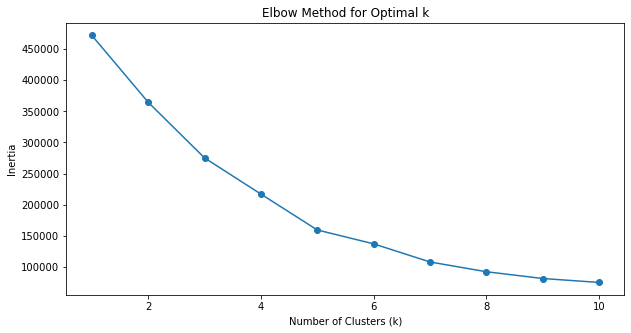

In [102]:
# Calculate the sum of squared distances for different values of k
inertia = []
K_range = range(1, 11)  # Testing k values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(linestyle='-.')
plt.show()


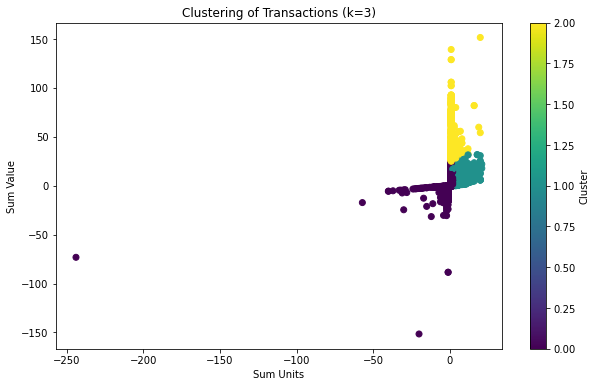

In [112]:
import matplotlib.pyplot as plt

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(full_data['Sum_Units'], full_data['Sum_Value'], c=full_data['Cluster'], cmap='viridis')
plt.title('Clustering of Transactions (k=3)')
plt.xlabel('Sum Units')
plt.ylabel('Sum Value')
plt.colorbar(label='Cluster')
plt.show()


In [113]:
# ### Analysis of the Clustering Graph:

# This graph represents the clustering of transactions using \( k = 3 \), where each color indicates a different cluster
# (0, 1, or 2).

# ### Key Points:
# 1. **Clusters Identified**:
#    - The **yellow cluster (Cluster 2)** shows transactions that have higher `Sum_Value` (total cost) and higher `Sum_Units`
# (number of items).
#    - The **green cluster (Cluster 1)** represents transactions that are moderate in terms of `Sum_Value` and `Sum_Units`.
#    - The **purple cluster (Cluster 0)** includes transactions with negative or near-zero `Sum_Units` and `Sum_Value`, 
# which may indicate returns or very low-value purchases.

# 2. **Distribution**:
#    - Most of the transactions are concentrated near zero for both `Sum_Units` and `Sum_Value`, indicating many small-value
# purchases.
#    - The spread of clusters along the `Sum_Value` axis suggests that some transactions have notably higher values compared 
#     to others.
#    - Outliers (points far from the center) in the purple cluster likely represent negative transactions, which could be
#returns
# or data anomalies.

# ### Simple Explanation:
# - The **yellow cluster** likely represents **larger purchases** where customers bought many items or expensive products.
# - The **green cluster** may show **medium-sized purchases** with an average number of items and cost.
# - The **purple cluster** shows **smaller or negative-value transactions**, possibly indicating returns or very low-value
#sales.

# ### What This Tells Us:
# - We have successfully grouped transactions into three distinct clusters based on the `Sum_Units` and `Sum_Value` features.
# - **Cluster 2 (yellow)** includes high-value transactions, **Cluster 1 (green)** shows medium-value transactions, and 
#**Cluster
# 0 (purple)** points to small or possibly problematic transactions like returns.

# Would you like to further analyze these clusters or proceed to another step, such as exploring customer or product
#segmentation?

#### Customer and Product Segmentation:

In [117]:
# Print column names in full_data
print("Columns in full_data:")
print(full_data.columns)

# Print column names in loyalty_df
print("\nColumns in loyalty_df:")
print(loyalty_df.columns)


Columns in full_data:
Index(['Basket_ID', 'Date', 'Barcode', 'Sum_Units', 'Sum_Value', 'Card_ID',
       'CategoryA', 'CategoryB', 'CategoryC', 'CategoryD',
       'CategoryBDescription', 'CategoryCDescription', 'CategoryDDescription',
       'Month', 'Day', 'Day_of_Week', 'Cluster'],
      dtype='object')

Columns in loyalty_df:
Index(['CardholderID', 'Age', 'Gender', 'MaritalStatus', 'HouseholdSize',
       'Children'],
      dtype='object')


In [ ]:
# Rename 'CardholderID' to 'Card_ID' in loyalty_df
loyalty_df.rename(columns={'CardholderID': 'Card_ID'}, inplace=True)

In [119]:
# Convert 'Card_ID' columns to string type in both DataFrames to ensure consistency
full_data['Card_ID'] = full_data['Card_ID'].astype(str)
loyalty_df['Card_ID'] = loyalty_df['Card_ID'].astype(str)  # 'CardholderID' was renamed to 'Card_ID' previously

# Merge full_data with loyalty_df on 'Card_ID'
full_data = pd.merge(full_data, loyalty_df[['Card_ID', 'Age', 'HouseholdSize']], on='Card_ID', how='left')

# Display the columns after merging
print("\nColumns after merging:")
print(full_data.columns)



Columns after merging:
Index(['Basket_ID', 'Date', 'Barcode', 'Sum_Units', 'Sum_Value', 'Card_ID',
       'CategoryA', 'CategoryB', 'CategoryC', 'CategoryD',
       'CategoryBDescription', 'CategoryCDescription', 'CategoryDDescription',
       'Month', 'Day', 'Day_of_Week', 'Cluster', 'Age', 'HouseholdSize'],
      dtype='object')


In [127]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,...,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster,Age_x,HouseholdSize_x,Age_y,HouseholdSize_y
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,pet,cat,4,15,Monday,0,NaN,NaN,54.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0,...,laundry,wash,4,17,Wednesday,0,NaN,NaN,52.0,3.0
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,...,pet,cat,3,13,Wednesday,1,NaN,NaN,48.0,1.0
3,1106160983,2013-04-24,211069400000,1,0.749817,9162005811409,20.0,56.0,183.0,9.0,...,fresh vegetables,OTHER VEGETABLES,4,24,Wednesday,0,NaN,NaN,72.0,1.0
4,1108695491,2013-05-01,520286400380,2,0.600000,9161003517351,40.0,31.0,316.0,1.0,...,"cleaning tools, gloves and fragrance",gloves,5,1,Wednesday,0,NaN,NaN,51.0,1.0


In [128]:
# Drop the duplicate columns (Age_x and HouseholdSize_x)
full_data.drop(columns=['Age_x', 'HouseholdSize_x'], inplace=True)

# Rename Age_y and HouseholdSize_y to Age and HouseholdSize
full_data.rename(columns={'Age_y': 'Age', 'HouseholdSize_y': 'HouseholdSize'}, inplace=True)

# Display a sample to verify the changes
print("\nSample of full_data after cleaning up columns:")
print(full_data[['Card_ID', 'Age', 'HouseholdSize']].head())



Sample of full_data after cleaning up columns:
         Card_ID   Age  HouseholdSize
0  9160003751260  54.0            2.0
1  9164001986624  52.0            3.0
2  9164012915385  48.0            1.0
3  9162005811409  72.0            1.0
4  9161003517351  51.0            1.0


In [129]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster,Age,HouseholdSize
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0,Detergents,laundry,wash,4,17,Wednesday,0,52.0,3.0
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,1,48.0,1.0
3,1106160983,2013-04-24,211069400000,1,0.749817,9162005811409,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,4,24,Wednesday,0,72.0,1.0
4,1108695491,2013-05-01,520286400380,2,0.600000,9161003517351,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,5,1,Wednesday,0,51.0,1.0


In [126]:
# Check unique sample values of 'Card_ID' in both DataFrames
print("Sample 'Card_ID' values in full_data:")
print(full_data['Card_ID'].unique()[:5])

print("\nSample 'Card_ID' values in loyalty_df:")
print(loyalty_df['Card_ID'].unique()[:5])

# Check for matching 'Card_ID' values
common_card_ids = set(full_data['Card_ID']).intersection(set(loyalty_df['Card_ID']))
print(f"\nNumber of common 'Card_ID' values: {len(common_card_ids)}")


Sample 'Card_ID' values in full_data:
['9160003751260' '9164001986624' '9164012915385' '9162005811409'
 '9161003517351']

Sample 'Card_ID' values in loyalty_df:
['9162002273446' '9164011076155' '9162001049684' '9162005608405'
 '9163002257856']

Number of common 'Card_ID' values: 4399


In [125]:
# Strip any leading/trailing spaces in 'Card_ID'
full_data['Card_ID'] = full_data['Card_ID'].str.strip()
loyalty_df['Card_ID'] = loyalty_df['Card_ID'].str.strip()


In [ ]:
# Customer Segmentation: Use features like Sum_Value, Card_ID, and demographic data (Age) to see how customers cluster
#     based on their purchasing power or preferences

In [130]:


# Select relevant features for customer segmentation
customer_features = full_data[['Age', 'Sum_Value', 'HouseholdSize']].dropna()  # Drop rows with NaN for simplicity

# Scale the features
scaled_customer_features = scaler.fit_transform(customer_features)

# Calculate the sum of squared distances for different values of k
inertia = []
K_range = range(1, 11)  # Testing k values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_customer_features)
    inertia.append(kmeans.inertia_)



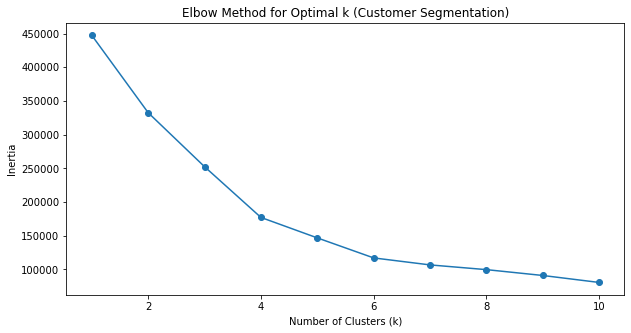

In [131]:
# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Customer Segmentation)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### selecting optimum value of k =4 from the elbow plot.

In [134]:
# Create a DataFrame of only the non-NaN rows used for scaling
filtered_full_data = full_data[['Card_ID', 'Age', 'Sum_Value', 'HouseholdSize']].dropna()

# Apply KMeans clustering with k=4
kmeans_customer = KMeans(n_clusters=4, random_state=42)
filtered_full_data['Customer_Cluster'] = kmeans_customer.fit_predict(scaled_customer_features)

# Merge the cluster labels back into full_data
full_data = pd.merge(full_data, filtered_full_data[['Card_ID', 'Customer_Cluster']], on='Card_ID', how='left')

# Display a sample of the data with customer cluster labels
print("\nSample of data with customer cluster labels:")
print(full_data[['Card_ID', 'Age', 'Sum_Value', 'HouseholdSize', 'Customer_Cluster']].head())



Sample of data with customer cluster labels:
         Card_ID   Age  Sum_Value  HouseholdSize  Customer_Cluster
0  9160003751260  54.0       1.96            2.0               0.0
1  9160003751260  54.0       1.96            2.0               0.0
2  9160003751260  54.0       1.96            2.0               0.0
3  9160003751260  54.0       1.96            2.0               0.0
4  9160003751260  54.0       1.96            2.0               0.0


In [135]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Cluster,Age,HouseholdSize,Customer_Cluster
0,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
1,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
2,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
3,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0
4,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,0,54.0,2.0,0.0


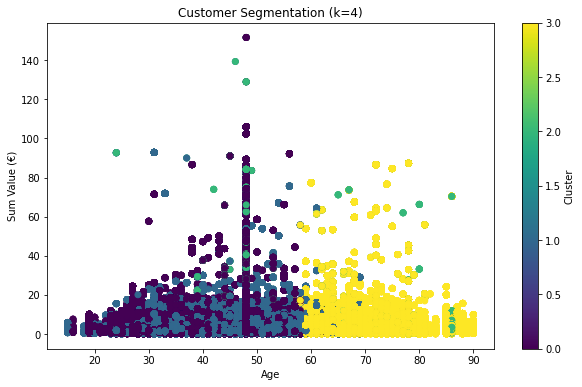

In [138]:
# Scatter plot for visualizing customer clusters based on Age and Sum_Value
plt.figure(figsize=(10, 6))
plt.scatter(full_data['Age'], full_data['Sum_Value'], c=full_data['Customer_Cluster'], cmap='viridis')
plt.title('Customer Segmentation (k=4)')
plt.xlabel('Age')
plt.ylabel('Sum Value (€)')
plt.colorbar(label='Cluster')
plt.show()


In [139]:
# Purple Cluster (Cluster 0):

# Contains customers of various ages, mostly with lower to moderate spending.
# This could represent a general group of average spenders.
# Green Cluster (Cluster 1):

# Includes customers with higher spending, scattered across a range of ages.
# These might be higher-value customers who make bigger purchases.
# Blue Cluster (Cluster 2):

# Has customers with high spending, but they are fewer in number.
# This could represent a special group of high-value or premium customers.
# Yellow Cluster (Cluster 3):

# Consists mostly of older customers with moderate spending.
# This might indicate a group of senior customers who spend consistently but not as much as the high-spending groups.

In [140]:
# Inference:
# The segmentation allows us to identify different types of customers:
# Low to moderate spenders (e.g., purple cluster).
# High-value spenders (e.g., green and blue clusters).
# Older customers with moderate spending habits (e.g., yellow cluster).
# This segmentation can help in targeting marketing efforts, personalizing promotions, or understanding customer
# behavior based on age and spending.

#### Product based segmentation :--

In [145]:
#1. Product Popularity (Sales Volume) Segmentation:

In [146]:
# Create a new DataFrame for product popularity analysis
popularity_df = full_data['Barcode'].value_counts().reset_index()
popularity_df.columns = ['Barcode', 'Purchase_Count']

In [147]:
# Scale the 'Purchase_Count' for clustering
scaler = StandardScaler()
popularity_df['Scaled_Purchase_Count'] = scaler.fit_transform(popularity_df[['Purchase_Count']])

In [148]:
# Find the optimal k using the elbow method
inertia = []
K_range = range(1, 11)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(popularity_df[['Scaled_Purchase_Count']])
    inertia.append(kmeans.inertia_)


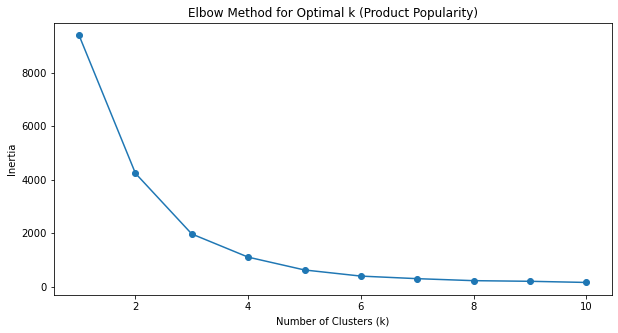

In [149]:
# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Product Popularity)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [150]:
# Apply KMeans with optimal k =3
kmeans_popularity = KMeans(n_clusters=3, random_state=42)
popularity_df['Popularity_Cluster'] = kmeans_popularity.fit_predict(popularity_df[['Scaled_Purchase_Count']])

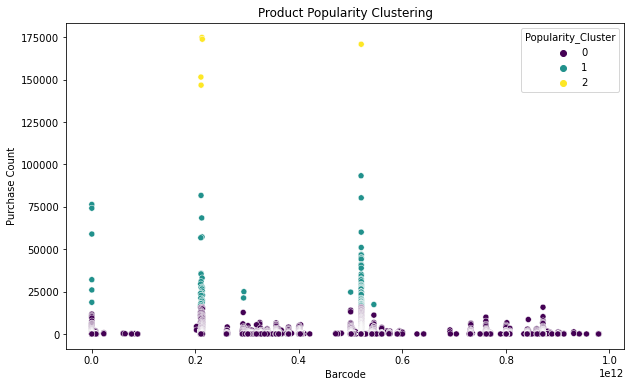

In [151]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=popularity_df, x='Barcode', y='Purchase_Count', hue='Popularity_Cluster', palette='viridis')
plt.title('Product Popularity Clustering')
plt.xlabel('Barcode')
plt.ylabel('Purchase Count')
plt.show()

In [188]:
# Step 1: Scale 'Purchase_Count' for clustering (if not already scaled and clustered)
scaler = StandardScaler()
full_data['Scaled_Purchase_Count'] = scaler.fit_transform(full_data[['Purchase_Count']])

In [189]:

# Apply KMeans to create `Popularity_Cluster` (assuming k=3 based on previous analysis)
kmeans_popularity = KMeans(n_clusters=3, random_state=42)
full_data['Popularity_Cluster'] = kmeans_popularity.fit_predict(full_data[['Scaled_Purchase_Count']])

In [ ]:
# Step 2: Set `Product_Display` to `CategoryBDescription` for easier interpretation
full_data['Product_Display1'] = full_data['CategoryBDescription']

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: Ma

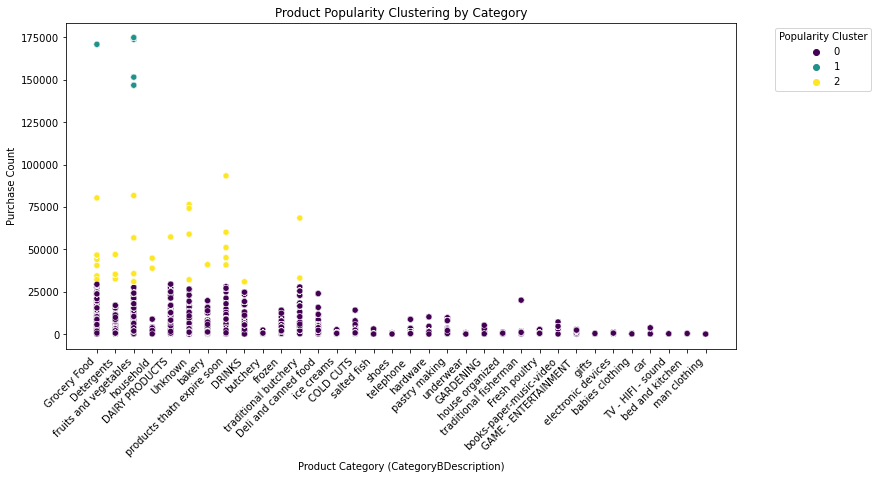

In [190]:

# Step 3: Plot with `CategoryBDescription` on the x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=full_data, x='Product_Display', y='Purchase_Count', hue='Popularity_Cluster', palette='viridis')
plt.title('Product Popularity Clustering by Category')
plt.xlabel('Product Category (CategoryBDescription)')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.legend(title='Popularity Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Purple (Cluster 0): Low popularity products with fewer purchases.
# Yellow (Cluster 2): High popularity products with many purchases.
# Green (Cluster 1): Moderate popularity products

In [ ]:
# Most categories fall under low popularity (purple), while categories like "Bakery" and "Products that expire soon" 
# have higher purchase counts and belong to the high popularity cluster (yellow), indicating they are frequently bought

In [ ]:
# Clusters:

# Cluster 0 (Purple): These are the products with the lowest purchase counts, meaning they are rarely purchased.
# Cluster 1 (Teal): These are moderately popular products that have a higher purchase count than Cluster 0 but are not 
#     as frequently purchased as the bestsellers.
# Cluster 2 (Yellow): These represent bestseller products that are purchased very frequently

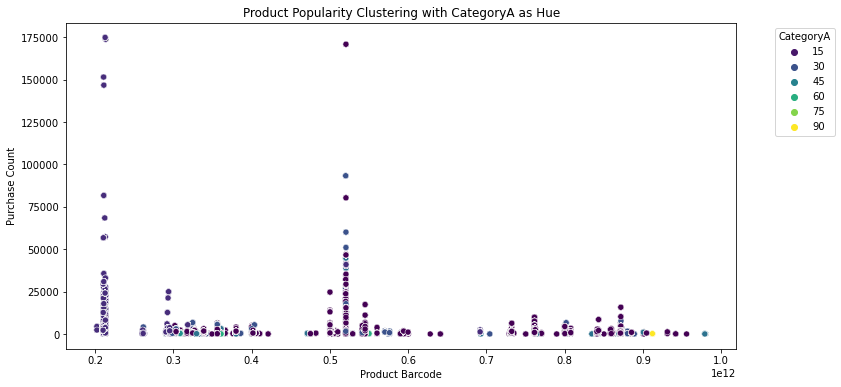

In [157]:
# Filter out rows where 'CategoryA' is 'Unknown' or similar non-informative values
filtered_data = full_data[full_data['CategoryA'] != 'Unknown']

# Plot with CategoryA as hue for better clarity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='Barcode', y='Purchase_Count', hue='CategoryA', palette='viridis')
plt.title('Product Popularity Clustering with CategoryA as Hue')
plt.xlabel('Product Barcode')
plt.ylabel('Purchase Count')
plt.legend(title='CategoryA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### 2. Revenue Contribution Segmentation

In [ ]:
# Now, we’ll cluster products based on the total revenue they generate. This will help us identify high-revenue products,
# mid-revenue products, and low-revenue products

In [158]:
# Step 1: Calculate Total Revenue for each product (Barcode)
# Sum 'Sum_Value' by 'Barcode' to get total revenue per product and merge it back to `full_data`
full_data['Total_Revenue'] = full_data.groupby('Barcode')['Sum_Value'].transform('sum')

In [162]:
full_data.head(20)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,...,Month,Day,Day_of_Week,Cluster,Age,HouseholdSize,Customer_Cluster,Purchase_Count,Total_Revenue,Scaled_Total_Revenue
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
1,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
2,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
3,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
4,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
5,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
6,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
7,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
8,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930
9,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,...,4,15,Monday,0,54.0,2.0,0.0,426,920.224233,-0.412930


In [159]:
# Step 2: Scale the 'Total_Revenue' for clustering
scaler = StandardScaler()
full_data['Scaled_Total_Revenue'] = scaler.fit_transform(full_data[['Total_Revenue']])

In [160]:
# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Testing k from 1 to 11 for simplicity

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data[['Scaled_Total_Revenue']])
    inertia.append(kmeans.inertia_)

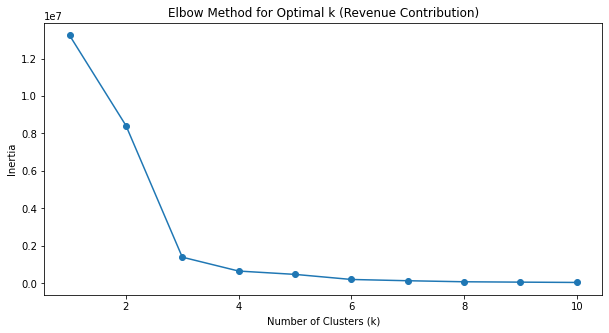

In [163]:
# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Revenue Contribution)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [164]:
# Step 4: Apply KMeans with optimal k =3
kmeans_revenue = KMeans(n_clusters=3, random_state=42)
full_data['Revenue_Cluster'] = kmeans_revenue.fit_predict(full_data[['Scaled_Total_Revenue']])

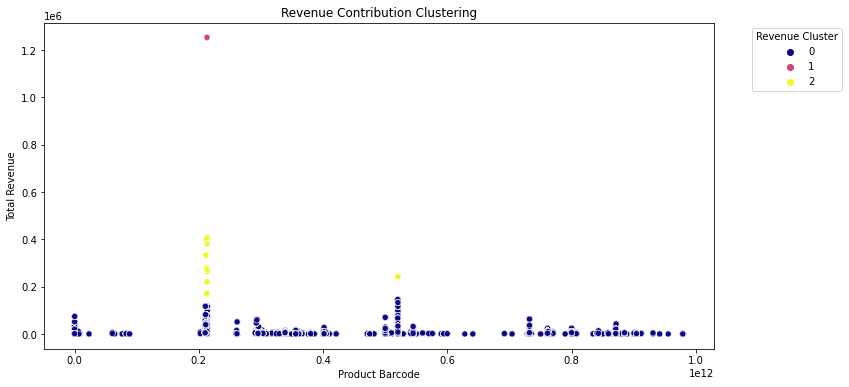

In [165]:
# Step 5: Visualize the clusters using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=full_data, x='Barcode', y='Total_Revenue', hue='Revenue_Cluster', palette='plasma')
plt.title('Revenue Contribution Clustering')
plt.xlabel('Product Barcode')
plt.ylabel('Total Revenue')
plt.legend(title='Revenue Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Step 1: Set `Product_Display` to `CategoryBDescription` to use descriptive names on x-axis
full_data['Product_Display'] = full_data['CategoryBDescription']

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: Ma

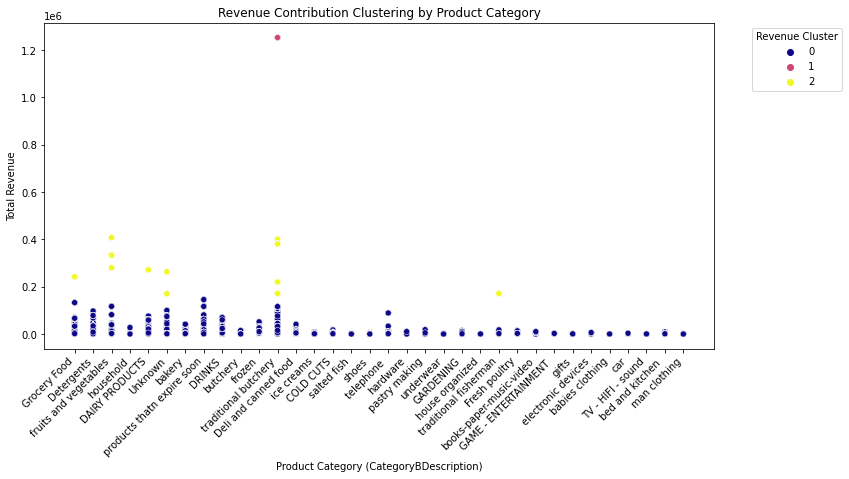

In [191]:
# Step 2: Plot Revenue Contribution Clustering using CategoryBDescription on the x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=full_data, x='Product_Display', y='Total_Revenue', hue='Revenue_Cluster', palette='plasma')
plt.title('Revenue Contribution Clustering by Product Category')
plt.xlabel('Product Category (CategoryBDescription)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Revenue Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Blue (Cluster 0): Low revenue categories with smaller contributions.
# Yellow (Cluster 2): Medium revenue categories with moderate contributions.
# Pink (Cluster 1): High revenue categories with significant contributions

In [ ]:
# Most categories fall into the low revenue cluster (blue), contributing less to the total revenue.
# Categories like "Bakery" and "Products that expire soon" are in the high revenue cluster (pink), indicating they 
# generate substantial revenue

#### Code for Revenue Contribution by Product Category

In [166]:
# Step 1: Group by 'CategoryA' and calculate total revenue for each category
category_revenue = full_data.groupby('CategoryA')['Sum_Value'].sum().reset_index()
category_revenue.columns = ['CategoryA', 'Total_Revenue']

In [167]:
# Step 2: Scale the 'Total_Revenue' for clustering
scaler = StandardScaler()
category_revenue['Scaled_Total_Revenue'] = scaler.fit_transform(category_revenue[['Total_Revenue']])

In [170]:
# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 6)  # Testing k from 1 to 5 for simplicity

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(category_revenue[['Scaled_Total_Revenue']])
    inertia.append(kmeans.inertia_)

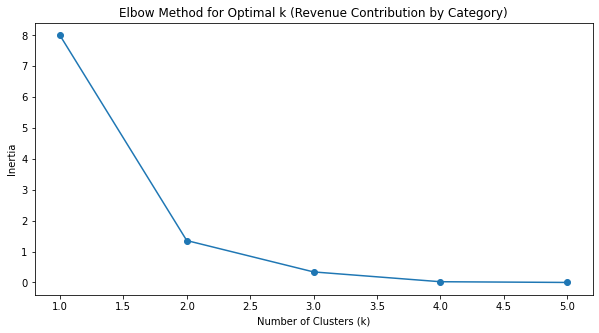

In [171]:

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Revenue Contribution by Category)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [172]:
# Step 4: Apply KMeans with optimal k (let's assume k=3 based on elbow plot)
kmeans_revenue = KMeans(n_clusters=3, random_state=42)
category_revenue['Revenue_Cluster'] = kmeans_revenue.fit_predict(category_revenue[['Scaled_Total_Revenue']])

In [174]:
# Filter out rows where 'CategoryA' has non-informative values like 'Unknown'
category_revenue_filtered = category_revenue[category_revenue['CategoryA'] != 'Unknown']

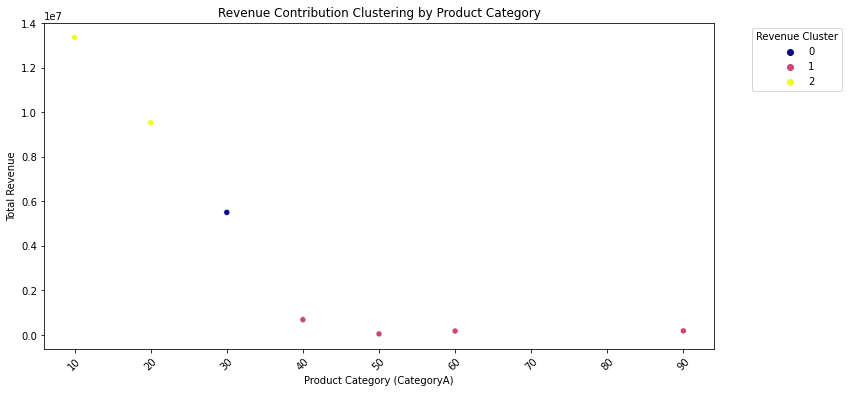

In [175]:

# Plot with `CategoryA` on the x-axis and `Total_Revenue` on the y-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=category_revenue_filtered, x='CategoryA', y='Total_Revenue', hue='Revenue_Cluster', palette='plasma')
plt.title('Revenue Contribution Clustering by Product Category')
plt.xlabel('Product Category (CategoryA)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.legend(title='Revenue Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Yellow (Cluster 2): Highest revenue categories. These categories contribute the most to overall revenue.
# Blue (Cluster 0): Medium revenue categories. These contribute a moderate amount to the revenue.
# Pink (Cluster 1): Low revenue categories. These categories have a smaller contribution to total sales.

#### Code for Product Return Rate Segmentation

In [176]:
# Step 1: Calculate Return Count for each product (assuming negative 'Sum_Value' indicates a return)
full_data['Return_Count'] = full_data[full_data['Sum_Value'] < 0].groupby('Barcode')['Barcode'].transform('count')

In [177]:
full_data['Return_Count'].fillna(0, inplace=True)  # Fill NaN values with 0 for products with no returns

In [178]:
# Step 2: Scale the 'Return_Count' for clustering
scaler = StandardScaler()
full_data['Scaled_Return_Count'] = scaler.fit_transform(full_data[['Return_Count']])

In [179]:
# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 6)  # Testing k from 1 to 5 for simplicity

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data[['Scaled_Return_Count']])
    inertia.append(kmeans.inertia_)

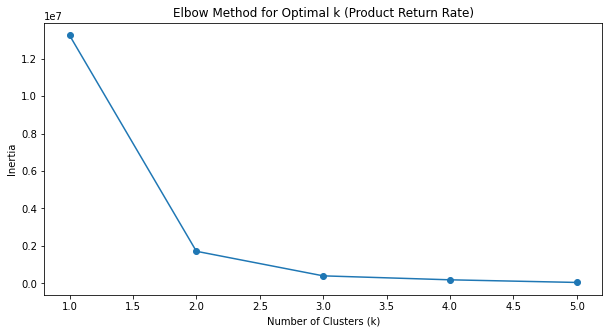

In [180]:
# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Product Return Rate)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [181]:
# Step 4: Apply KMeans with optimal k (let's assume k=3 based on elbow plot)
kmeans_return = KMeans(n_clusters=3, random_state=42)
full_data['Return_Cluster'] = kmeans_return.fit_predict(full_data[['Scaled_Return_Count']])

In [182]:
# Step 5: Use `CategoryBDescription` for x-axis if available
full_data['Product_Display'] = full_data['CategoryBDescription']

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\relational.py:337: Ma

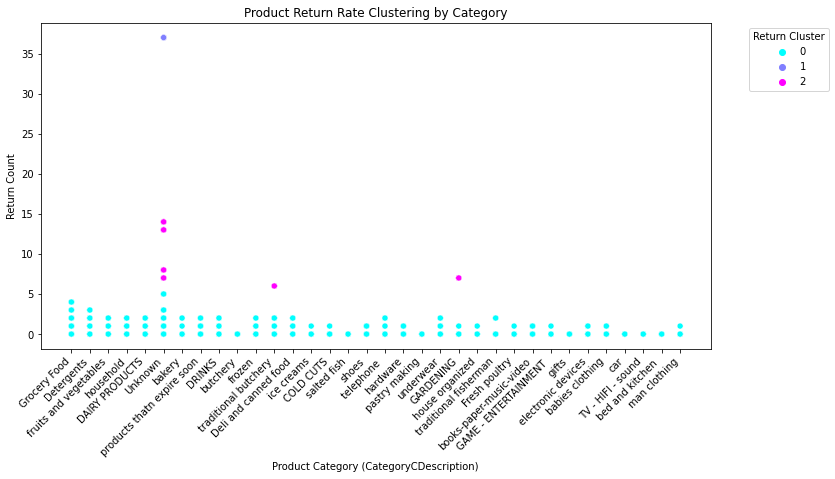

In [183]:
# Step 6: Plot Return Rate Clustering with `CategoryCDescription` on x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=full_data, x='Product_Display', y='Return_Count', hue='Return_Cluster', palette='cool')
plt.title('Product Return Rate Clustering by Category')
plt.xlabel('Product Category (CategoryCDescription)')
plt.ylabel('Return Count')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels for readability
plt.legend(title='Return Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Each color represents a different return cluster:
# Blue (Cluster 0): Categories with a low return rate (most points are in this cluster).
# Purple (Cluster 1): Categories with a moderate return rate.
# Pink (Cluster 2): Categories with a high return rate

In [ ]:
# Key Observations
# Most product categories are in the low return rate cluster (blue dots), which indicates that they have few or no returns.
# Categories in the high return rate cluster (pink dots) include "Unknown," "Products that expire soon," and "Bakery."
# These may be categories where returns are more common, possibly due to perishability or other issues.
# Moderate return rate categories (purple dots) include a few categories like "Bakery" and "Traditional Butchery."
# This plot helps identify which product categories have higher return rates. Categories with frequent returns might need
# further attention, possibly due to quality or perishability concerns.

In [184]:
full_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,...,HouseholdSize,Customer_Cluster,Purchase_Count,Total_Revenue,Scaled_Total_Revenue,Revenue_Cluster,Return_Count,Scaled_Return_Count,Return_Cluster,Product_Display
0,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,...,2.0,0.0,426,920.224233,-0.41293,0,0.0,-0.002931,0,Grocery Food
1,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,...,2.0,0.0,426,920.224233,-0.41293,0,0.0,-0.002931,0,Grocery Food
2,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,...,2.0,0.0,426,920.224233,-0.41293,0,0.0,-0.002931,0,Grocery Food
3,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,...,2.0,0.0,426,920.224233,-0.41293,0,0.0,-0.002931,0,Grocery Food
4,1103084867,2013-04-15,800220505783,2,1.96,9160003751260,10.0,14.0,239.0,2.0,...,2.0,0.0,426,920.224233,-0.41293,0,0.0,-0.002931,0,Grocery Food


#### Apriori Algorithm for Market Basket Analysis :--

#### Step 1: Prepare the Data for Apriori Analysis

In [192]:
# Create a pivot table where rows are transactions (Basket_ID), columns are product names, and values are binary 
#(0/1 for purchase)
basket = full_data.pivot_table(index='Basket_ID', columns='CategoryBDescription', aggfunc='size', fill_value=0)

In [193]:
# Convert values to 1 (indicating presence of the product) where the product appears in a transaction
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [195]:
pd.set_option('display.max_columns',None)

In [196]:
basket.head()

CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
Basket_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089674688,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1089674689,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1089674690,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1089674691,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1089674692,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Step 2: Apply the Apriori Algorithm

In [ ]:
# Goal: Find frequent product combinations.
# Approach: Set a minimum support threshold (e.g., 5%) to identify common combinations

In [197]:
# Set the minimum support threshold (e.g., 5% of transactions)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [200]:
frequent_itemsets.head(10)

,support,itemsets
0,0.260564,(DAIRY PRODUCTS)
1,0.250274,(DRINKS)
2,0.083755,(Deli and canned food)
3,0.332824,(Detergents)
4,0.618895,(Grocery Food)
5,0.240588,(Unknown)
6,0.080311,(bakery)
7,0.102719,(frozen)
8,0.300880,(fruits and vegetables)
9,0.085520,(household)


In [201]:
# Display the frequent itemsets
print(frequent_itemsets)

     support                                           itemsets
0   0.260564                                   (DAIRY PRODUCTS)
1   0.250274                                           (DRINKS)
2   0.083755                             (Deli and canned food)
3   0.332824                                       (Detergents)
4   0.618895                                     (Grocery Food)
5   0.240588                                          (Unknown)
6   0.080311                                           (bakery)
7   0.102719                                           (frozen)
8   0.300880                            (fruits and vegetables)
9   0.085520                                        (household)
10  0.356609                       (products thatn expire soon)
11  0.086682                             (traditional butchery)
12  0.075618                           (DRINKS, DAIRY PRODUCTS)
13  0.053921             (Deli and canned food, DAIRY PRODUCTS)
14  0.102353                       (DAIR

In [ ]:
# The apriori function finds all combinations of products that meet the support threshold, showing us the frequently
# purchased product sets.

In [ ]:
# Support Value: The support value shows the percentage of transactions where each itemset (combination of products) was bought 
#     together. For example:

# A support of 0.260564 for (DAIRY PRODUCTS) means that about 26% of all transactions included "Dairy Products."
# A support of 0.072992 for (DRINKS, Grocery Food, Detergents) means that around 7.3% of transactions included all three
# items together: "Drinks," "Grocery Food," and "Detergents."


In [ ]:
# Single Product Frequencies: The rows with only one product (like (DAIRY PRODUCTS) or (Grocery Food)) indicate the most
#     frequently purchased individual products.

# "Grocery Food" appears in about 61.9% of transactions.
# "Detergents" appear in about 33.3% of transactions.

# Popular Product Pairs: Some pairs of products are often bought together, like:

# (DRINKS, Grocery Food) with a support of 17.8%: This means around 17.8% of transactions included both "Drinks" and
#     "Grocery Food."
# (DAIRY PRODUCTS, Grocery Food) with a support of 19.5%: About 19.5% of transactions had both "Dairy Products" and
#     "Grocery Food."

# Frequent Product Combinations: We also see combinations of three or more products frequently bought together. For instance:

# (products that expire soon, DAIRY PRODUCTS, Grocery Food) with a support of 10.1% indicates that these three items appear
# together in around 10.1% of transactions.
# (fruits and vegetables, Grocery Food, Detergents) with a support of 8.2% suggests that this combination is also relatively
# common.

In [ ]:
# What This Means for Product Recommendations:
# Highly Purchased Products: We know that "Grocery Food," "Dairy Products," and "Detergents" are popular items individually, 
#     so it may be beneficial to keep them well-stocked.
# Commonly Bought Together: By identifying common pairs or groups, we can make recommendations:
# If a customer buys "Grocery Food," they might also be interested in "Drinks" or "Dairy Products."
# If someone buys "products that expire soon" and "Dairy Products," it may be useful to suggest "Grocery Food" as well.

#### Step 3: Generate Association Rules for Recommendations

In [202]:
# Generate association rules with a minimum confidence level (e.g., 50%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [204]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Deli and canned food),(DAIRY PRODUCTS),0.083755,0.260564,0.053921,0.643793,2.470773,0.032097,2.075864,0.649682
1,(DAIRY PRODUCTS),(Grocery Food),0.260564,0.618895,0.195170,0.749029,1.210269,0.033908,1.518524,0.234959
2,(DRINKS),(Grocery Food),0.250274,0.618895,0.177670,0.709899,1.147044,0.022776,1.313700,0.170987
3,(Deli and canned food),(Grocery Food),0.083755,0.618895,0.064942,0.775379,1.252845,0.013106,1.696659,0.220265
4,(Detergents),(Grocery Food),0.332824,0.618895,0.226511,0.680572,1.099656,0.020528,1.193085,0.135834
5,(Unknown),(Grocery Food),0.240588,0.618895,0.160858,0.668605,1.080321,0.011960,1.150003,0.097904
6,(bakery),(Grocery Food),0.080311,0.618895,0.052479,0.653444,1.055824,0.002775,1.099693,0.057490
7,(frozen),(Grocery Food),0.102719,0.618895,0.074542,0.725692,1.172560,0.010970,1.389330,0.164012
8,(fruits and vegetables),(Grocery Food),0.300880,0.618895,0.201240,0.668837,1.080695,0.015027,1.150807,0.106805
9,(household),(Grocery Food),0.085520,0.618895,0.062574,0.731689,1.182251,0.009646,1.420385,0.168572


In [205]:
# Display each recommendation rule in a readable format
for index, row in rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"If a customer buys {antecedent}, they may also be interested in {consequent} (Confidence: {row['confidence']:.2f})")


If a customer buys Deli and canned food, they may also be interested in DAIRY PRODUCTS (Confidence: 0.64)
If a customer buys DAIRY PRODUCTS, they may also be interested in Grocery Food (Confidence: 0.75)
If a customer buys DRINKS, they may also be interested in Grocery Food (Confidence: 0.71)
If a customer buys Deli and canned food, they may also be interested in Grocery Food (Confidence: 0.78)
If a customer buys Detergents, they may also be interested in Grocery Food (Confidence: 0.68)
If a customer buys Unknown, they may also be interested in Grocery Food (Confidence: 0.67)
If a customer buys bakery, they may also be interested in Grocery Food (Confidence: 0.65)
If a customer buys frozen, they may also be interested in Grocery Food (Confidence: 0.73)
If a customer buys fruits and vegetables, they may also be interested in Grocery Food (Confidence: 0.67)
If a customer buys household, they may also be interested in Grocery Food (Confidence: 0.73)
If a customer buys products thatn expir

In [206]:
#------------------------------------X------------------------X--------------------------------X----------------------------

#### running Apriori on CategoryDDescription (which gives specific item names) 

In [208]:
product_taxonomy_df.head(10)

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea
5,10,11,DRINKS,261,BEVERAGES,7,milk shake
6,10,11,DRINKS,261,BEVERAGES,8,Syrup Concentrated
7,10,11,DRINKS,261,BEVERAGES,9,DIET / VEGETABLE JUICES
8,10,11,DRINKS,261,BEVERAGES,10,energy drinks
9,10,11,DRINKS,261,soft drinks,11,tea


#### Step 1: Prepare the Data for Apriori

In [220]:
# Create a pivot table for Apriori analysis with CategoryDDescription
basket_d = full_data.pivot_table(index='Basket_ID', 
                                 columns='CategoryDDescription', 
                                 aggfunc='size', 
                                 fill_value=0)

In [221]:
basket_d = basket_d.applymap(lambda x: 1 if x > 0 else 0)

#### Step 2: Apply Apriori to Find Frequent Itemsets

In [222]:
# Find frequent itemsets with Apriori
frequent_itemsets_d = apriori(basket_d, min_support=0.05, use_colnames=True)
frequent_itemsets_d.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets_d.head()

C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.240588,(Unknown)
7,0.146566,(fresh milk )
8,0.128614,(high pasterized )
15,0.108832,(white)
6,0.084724,(cola)


#### Step 3: Generate Association Rules

In [223]:
# Generate association rules based on confidence
rules_d = association_rules(frequent_itemsets_d, metric="confidence", min_threshold=0.6)
rules_d = rules_d[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_d.sort_values(by='confidence', ascending=False, inplace=True)

In [224]:
rules_d

,antecedents,consequents,support,confidence,lift


In [238]:
# Adjust minimum support to a lower threshold
frequent_itemsets_d = apriori(basket_d, min_support=0.01, use_colnames=True)
frequent_itemsets_d.sort_values(by='support', ascending=False, inplace=True)

C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [239]:
frequent_itemsets_d.head()




,support,itemsets
21,0.240588,(Unknown)
49,0.146566,(fresh milk )
57,0.128614,(high pasterized )
112,0.108832,(white)
36,0.084724,(cola)


#### Step 2: Reducing Minimum Confidence Threshold

In [236]:
# Generate association rules with a lower confidence threshold
rules_d = association_rules(frequent_itemsets_d, metric="confidence", min_threshold=0.1)
rules_d = rules_d[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_d.sort_values(by='confidence', ascending=False, inplace=True)

In [237]:
rules_d.head()

,antecedents,consequents,support,confidence,lift
6,(TOMATOES),(Unknown),0.030717,0.517592,2.151360
8,(soft cheese ),(Unknown),0.029640,0.389313,1.618172
18,(ONMS - Dried garlic),(Unknown),0.023441,0.380503,1.581554
14,(POTATOES),(Unknown),0.024496,0.369481,1.535739
10,(LIMITED DURATION),(Unknown),0.027273,0.357304,1.485128


In [240]:
# Step 1: Set an even lower minimum support threshold (e.g., 1%) and a lower confidence threshold (e.g., 20%)
frequent_itemsets_d = apriori(basket_d, min_support=0.01, use_colnames=True)
frequent_itemsets_d.sort_values(by='support', ascending=False, inplace=True)

C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [241]:
# Step 2: Generate association rules with a low confidence threshold and apply a minimum lift threshold
rules_d = association_rules(frequent_itemsets_d, metric="confidence", min_threshold=0.2)
rules_d = rules_d[rules_d['lift'] > 1.1]  # Apply lift threshold to ensure meaningful associations
rules_d = rules_d[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_d.sort_values(by='confidence', ascending=False, inplace=True)

In [242]:
# Display the resulting rules
rules_d.head()

,antecedents,consequents,support,confidence,lift
50,(herbs),(Unknown),0.010375,0.584951,2.431340
41,(poultry),(soft cheese ),0.011538,0.570820,7.497480
3,(TOMATOES),(Unknown),0.030717,0.517592,2.151360
32,(PEPPERS),(Unknown),0.013066,0.465848,1.936289
34,(CARROTS),(Unknown),0.012808,0.463757,1.927597


In [252]:
# Filter out transactions containing "Unknown" in CategoryDDescription
filtered_data_2 = full_data[full_data['CategoryDDescription'] != "Unknown"]

In [254]:
# Create the pivot table without "Unknown" entries
basket_d2 = filtered_data_2.pivot_table(index='Basket_ID', 
                                     columns='CategoryDDescription', 
                                     aggfunc='size', 
                                     fill_value=0)

In [255]:
basket_d2 = basket_d2.applymap(lambda x: 1 if x > 0 else 0)

#### 2. Re-run Apriori and Generate Association Rules

In [268]:
# Apply Apriori to find frequent itemsets with the filtered data
frequent_itemsets_d2 = apriori(basket_d2, min_support=0.01, use_colnames=True)
frequent_itemsets_d2.sort_values(by='support', ascending=False, inplace=True)

C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [293]:
# Generate association rules with adjusted confidence and lift thresholds
rules_d2 = association_rules(frequent_itemsets_d2, metric="confidence", min_threshold=0.3)
rules_d2 = rules_d2[rules_d2['lift'] > 2]  # Ensure useful associations by applying a lift threshold
rules_d2 = rules_d2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_d2.sort_values(by='confidence', ascending=False, inplace=True)

In [294]:
rules_d2

,antecedents,consequents,support,confidence,lift
4,(whole),(legs),0.010157,0.970711,60.008085
5,(legs),(whole),0.010157,0.627876,60.008085
2,(poultry),(soft cheese ),0.011733,0.570820,7.372729
6,(PEPPERS),(TOMATOES),0.010047,0.352264,5.837080
1,(soft cheese ),(LIMITED DURATION),0.025326,0.327113,4.214283
0,(LIMITED DURATION),(soft cheese ),0.025326,0.326283,4.214283
3,(APPLES),(BANANAS),0.011448,0.300402,4.945430


In [ ]:
# Support: The percentage of transactions where a product or product combination appears.

# Example: If 10% of transactions contain "Milk and Bread," the support for this itemset is 0.10 (or 10%).
# Confidence: The likelihood that the consequent is bought when the antecedent is bought.

# Example: If 80% of the time that "Milk" is bought, "Bread" is also bought, the confidence for the rule "Milk → Bread" is 0.80.
# Lift: How much more likely the consequent is bought with the antecedent than by chance.

# Example: If the lift of "Milk → Bread" is 1.5, it means "Bread" is 1.5 times more likely to be bought when "Milk" is bought
#     than by random chance.

In [ ]:
# Explanation of Each Rule
# (whole → legs):

# When customers buy "whole", they almost always buy "legs" too, with a 97% confidence and a very strong lift of 60, meaning 
# these items are often bought together.
# (legs → whole):

# This rule goes both ways: If customers buy "legs", they also often buy "whole" (63% confidence, lift of 60).
# (poultry → soft cheese):

# If customers buy "poultry", they are also likely to buy "soft cheese" (57% confidence, lift of 7.37), suggesting these two 
# items are often paired.
# (PEPPERS → TOMATOES):

# If customers buy "PEPPERS", they sometimes buy "TOMATOES" as well (35% confidence, lift of 5.84).
# (soft cheese → LIMITED DURATION):

# When "soft cheese" is bought, "LIMITED DURATION" items are also frequently bought together (33% confidence, lift of 4.21).
# (APPLES → BANANAS):

# Customers who buy "APPLES" often buy "BANANAS" too (30% confidence, lift of 4.94), making this a common fruit combination.
# Summary
# These rules show strong product pairs, like whole & legs and APPLES & BANANAS, which could be useful for product placement or
# suggesting complementary items to customers.

#### Time series Analysis :--

#### Step 1: Create a New DataFrame for Analysis

In [299]:
# Create a new DataFrame from full_data with relevant columns and filter out unknown values
time_series_data = full_data[['Date', 'CategoryBDescription', 'Sum_Units', 'Sum_Value', 'Month', 'Day', 'Day_of_Week']].copy()
time_series_data = time_series_data[time_series_data['CategoryBDescription'] != 'Unknown']

In [300]:
time_series_data.head()

,Date,CategoryBDescription,Sum_Units,Sum_Value,Month,Day,Day_of_Week
0,2013-04-15,Grocery Food,2,1.96,4,15,Monday
1,2013-04-15,Grocery Food,2,1.96,4,15,Monday
2,2013-04-15,Grocery Food,2,1.96,4,15,Monday
3,2013-04-15,Grocery Food,2,1.96,4,15,Monday
4,2013-04-15,Grocery Food,2,1.96,4,15,Monday


In [303]:
# Ensure the Date column is in datetime format
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])

In [306]:
# Set Date as the index to facilitate time series operations
time_series_data.set_index('Date', inplace=True)

#### Step 2: Daily and Monthly Aggregations Using Existing Columns

In [310]:
# Since we already have Month and Day_of_Week columns, we’ll perform both daily and monthly aggregations based on these
# columns and check for seasonal patterns.

In [309]:
# Aggregate daily sales and revenue by product category
daily_sales = time_series_data.groupby(['Date', 'CategoryBDescription']).agg({'Sum_Units': 'sum', 'Sum_Value': 'sum'}).reset_index()

In [311]:
# Aggregate monthly sales and revenue by product category
monthly_sales = time_series_data.groupby(['Month', 'CategoryBDescription']).agg({'Sum_Units': 'sum', 'Sum_Value': 'sum'}).reset_index()

In [313]:
daily_sales.head(50)

,Date,CategoryBDescription,Sum_Units,Sum_Value
0,2013-03-04,COLD CUTS,4555,9625.991157
1,2013-03-04,DAIRY PRODUCTS,24293,56448.876033
2,2013-03-04,DRINKS,26812,24520.044692
3,2013-03-04,Deli and canned food,5282,11746.109213
4,2013-03-04,Detergents,76411,119717.325245
5,2013-03-04,Fresh poultry,352,2499.869874
6,2013-03-04,GARDENING,514,558.448896
7,2013-03-04,Grocery Food,117388,131079.093803
8,2013-03-04,bakery,3880,4193.041178
9,2013-03-04,bed and kitchen,379,793.001596


In [315]:
monthly_sales.head(50)

,Month,CategoryBDescription,Sum_Units,Sum_Value
0,3,COLD CUTS,77228,1.360741e+05
1,3,DAIRY PRODUCTS,470962,1.169221e+06
2,3,DRINKS,542198,6.859464e+05
3,3,Deli and canned food,147660,3.310754e+05
4,3,Detergents,727910,1.740942e+06
5,3,Fresh poultry,5965,3.551771e+04
6,3,GAME - ENTERTAINMENT,5280,6.214594e+03
7,3,GARDENING,13576,2.295197e+04
8,3,Grocery Food,2443059,3.053857e+06
9,3,TV - HIFI - sound,93,3.255014e+02


#### Step 3: Analyze Sales Patterns by Day of the Week

In [316]:
#Using Day_of_Week, we can analyze how sales vary across different days to identify peak days for specific product categories

In [317]:
# Aggregate sales by day of the week and product category
weekly_sales = time_series_data.groupby(['Day_of_Week', 'CategoryBDescription']).agg({'Sum_Units': 'sum', 'Sum_Value': 'sum'}).reset_index()


In [318]:
# Pivot data for easier plotting
weekly_sales_pivot = weekly_sales.pivot(index='Day_of_Week', columns='CategoryBDescription', values='Sum_Value')

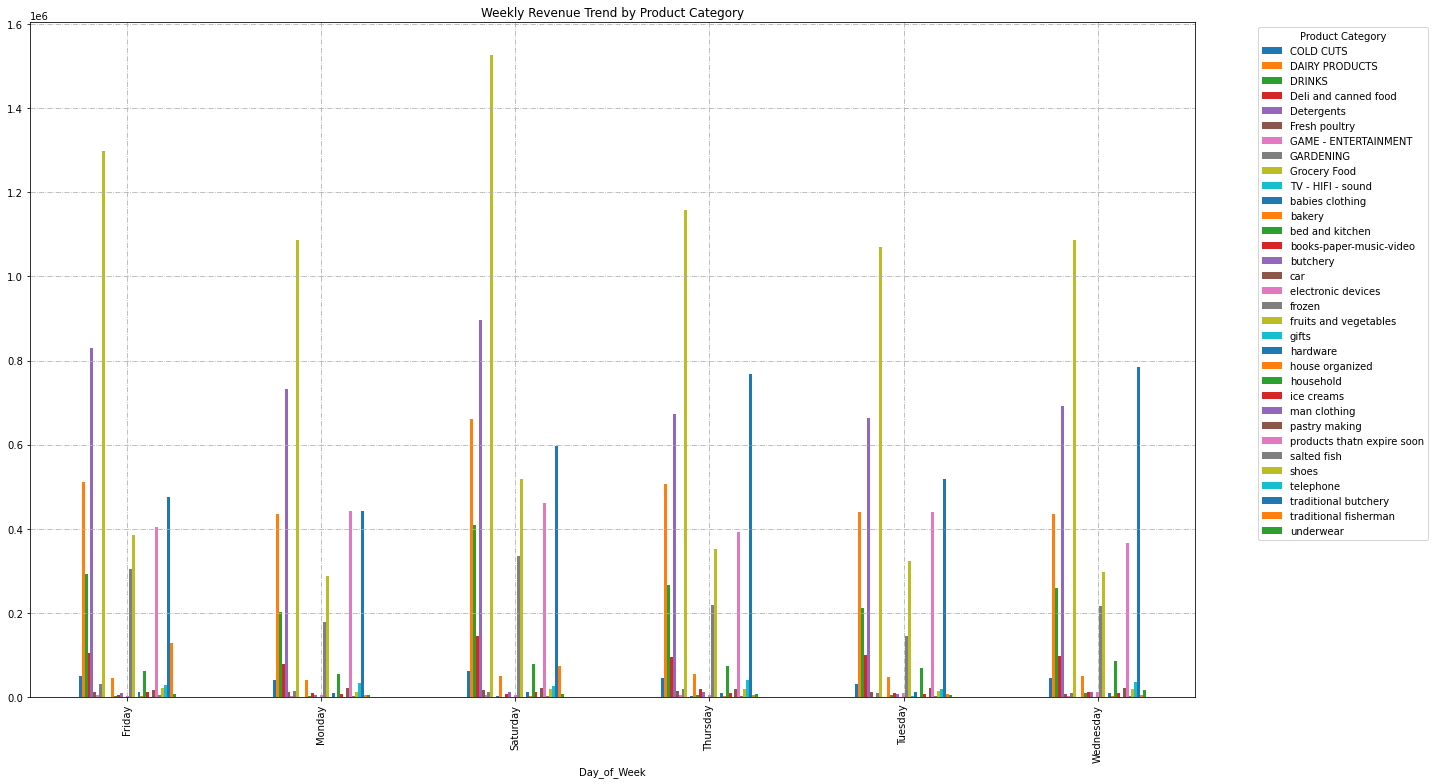

In [338]:
# Plot the weekly revenue trends by product category
weekly_sales_pivot.plot(kind='bar', figsize=(20, 11), title='Weekly Revenue Trend by Product Category')
plt.grid(linestyle='-.')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


In [ ]:
# This bar chart shows the revenue generated by different product categories across each day of the week. Key observations
# include:

# Saturday has the highest peak for certain categories, especially "products that expire soon" (around 1.5 million).
# Friday  also show significant revenue spikes in various categories like Detergents, DRINKS, and Grocery Food
# (ranging between 0.4 to 0.8 million).
# Monday to Wednesday generally have lower sales, with fewer and shorter bars across categories.
# "Grocery Food", "Detergents", and "DRINKS" are consistently purchased throughout the week, while other categories like
# "household" and "underwear" have sporadic sales.
# Conclusion: Sales tend to peak on weekends, especially for products with shorter shelf lives, indicating that people
#     likely stock up for the week on these days.

In [339]:
monthly_sales.head()

,Month,CategoryBDescription,Sum_Units,Sum_Value
0,3,COLD CUTS,77228,1.360741e+05
1,3,DAIRY PRODUCTS,470962,1.169221e+06
2,3,DRINKS,542198,6.859464e+05
3,3,Deli and canned food,147660,3.310754e+05
4,3,Detergents,727910,1.740942e+06


In [340]:
# Sort the index to ensure months are in chronological order from Jan to Dec
monthly_sales = monthly_sales.sort_index()

<Figure size 1152x720 with 0 Axes>

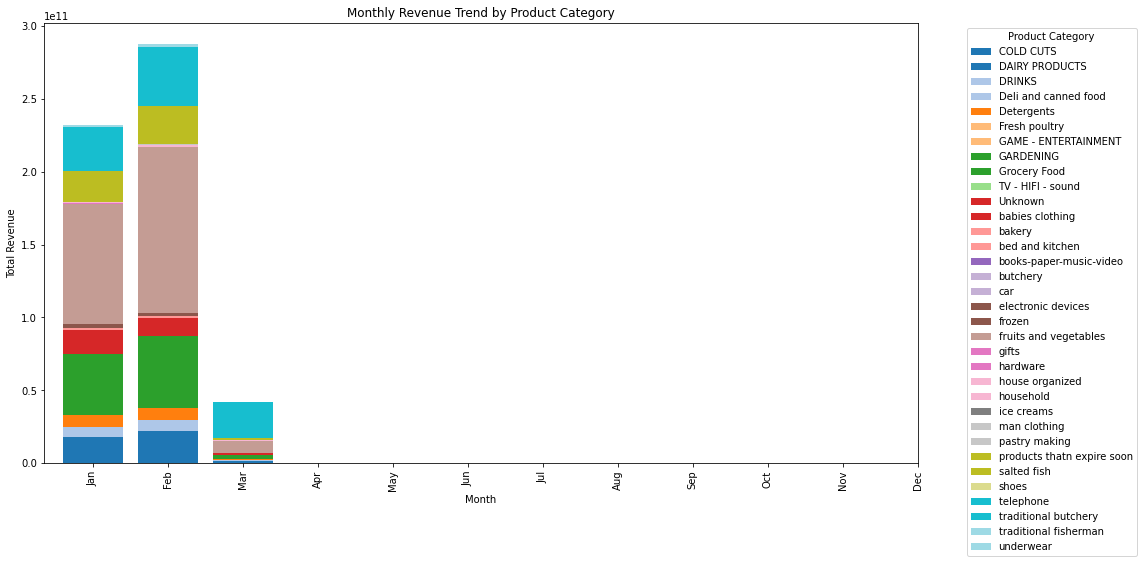

In [350]:


# Assuming `full_data` contains the necessary data for 'Month', 'CategoryBDescription', and 'Total_Revenue'

# Create a pivot table for monthly revenue by product category
monthly_sales1 = full_data.pivot_table(index='Month', columns='CategoryBDescription', values='Total_Revenue', aggfunc='sum')

# Sort the index to ensure months are in chronological order from Jan to Dec
monthly_sales1 = monthly_sales1.sort_index()

# Increase figure size for better readability
plt.figure(figsize=(16, 10))

# Plotting the monthly revenue trend by product category
monthly_sales1.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 8), colormap='tab20')

# Setting plot labels and title
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend by Product Category")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show();


In [351]:
pos_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12


In [352]:
pos_df2 = pos_df

In [354]:
pos_df2.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12


In [355]:
# Convert the 'Date' column to a readable date format (assuming it's in Excel date format)
pos_df2['Date'] = pd.to_datetime(pos_df2['Date'], origin='1899-12-30', unit='D')
pos_df2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12


In [356]:
pos_df2.shape

(235474, 6)

In [357]:
product_taxonomy_df.head()

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea


In [358]:
barcodes_df.head()

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1


In [359]:
barcodes_df.shape

(9039, 5)

In [361]:
####  Ensure all barcodes have 12 digits
pos_df2[pos_df2['Barcode'].astype(str).str.len() == 12]

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12
...,...,...,...,...,...,...
235469,1093498033,2013-03-15,210996300000,1,4.040059,9.164013e+12
235470,1102688274,2013-04-13,520423909932,1,1.000000,9.162000e+12
235471,1089686077,2013-03-04,210757000000,1,1.330066,9.164004e+12
235472,1099519315,2013-04-04,520423915759,2,3.180015,NaN


In [362]:
pos_barcodes_df2 = pd.merge(pos_df2, barcodes_df, on='Barcode', how='left')
pos_barcodes_df2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0


In [363]:
# Merge the combined POS and barcodes data with product taxonomy data using category columns
full_data2 = pd.merge(
    pos_barcodes_df2, 
    product_taxonomy_df, 
    on=['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD'], 
    how='left'
)
full_data2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves


In [364]:
full_data2.isnull().sum()

Basket_ID                   0
Date                        0
Barcode                     0
Sum_Units                   0
Sum_Value                   0
Card_ID                 86989
CategoryA               12301
CategoryB               12301
CategoryC               12301
CategoryD               12301
CategoryBDescription    14557
CategoryCDescription    14557
CategoryDDescription    14557
dtype: int64

In [365]:
full_data2.shape

(236086, 13)

In [366]:
full_data2.CategoryBDescription.fillna('Unknown',inplace=True)

In [367]:
full_data2.isnull().sum()

Basket_ID                   0
Date                        0
Barcode                     0
Sum_Units                   0
Sum_Value                   0
Card_ID                 86989
CategoryA               12301
CategoryB               12301
CategoryC               12301
CategoryD               12301
CategoryBDescription        0
CategoryCDescription    14557
CategoryDDescription    14557
dtype: int64

In [368]:
# Create new columns for year, month, day, and day of the week
full_data2['Year'] = full_data2['Date'].dt.year
full_data2['Month'] = full_data2['Date'].dt.month
full_data2['Day'] = full_data2['Date'].dt.day
full_data2['Day_of_Week'] = full_data2['Date'].dt.day_name()  # Gives the name of the day (e.g., 'Monday')

In [369]:
full_data2.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Year,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash,2013,4,17,Wednesday


In [370]:
full_data2.shape

(236086, 17)

In [387]:
full_data2['Month'].unique()

array([4, 3, 5], dtype=int64)

In [371]:
# Create a new DataFrame from full_data with relevant columns and filter out unknown values
time_series_data2 = full_data2[['Date', 'CategoryBDescription', 'Sum_Units', 'Sum_Value', 'Month', 'Day', 'Day_of_Week']].copy()

In [376]:
time_series_data2 .head()

,CategoryBDescription,Sum_Units,Sum_Value,Month,Day,Day_of_Week
Date,,,,,,
2013-04-15,Grocery Food,2,1.960000,4,15,Monday
2013-04-17,Detergents,1,5.349993,4,17,Wednesday
2013-03-13,Grocery Food,6,1.740015,3,13,Wednesday
2013-04-24,fruits and vegetables,1,0.749817,4,24,Wednesday
2013-05-01,household,2,0.600000,5,1,Wednesday


In [374]:
# Ensure the Date column is in datetime format
time_series_data2['Date'] = pd.to_datetime(time_series_data2['Date'])

In [375]:
# Set Date as the index to facilitate time series operations
time_series_data2.set_index('Date', inplace=True)

In [377]:
# Aggregate monthly sales and revenue by product category
monthly_sales2 = time_series_data2.groupby(['Month', 'CategoryBDescription']).agg({'Sum_Units': 'sum', 'Sum_Value': 'sum'}).reset_index()


In [381]:
monthly_sales2.head()

,Month,CategoryBDescription,Sum_Units,Sum_Value
0,3,COLD CUTS,1395,2453.333739
1,3,DAIRY PRODUCTS,7811,20915.531559
2,3,DRINKS,9978,13847.389436
3,3,Deli and canned food,2625,6192.906450
4,3,Detergents,14325,35856.080820


In [382]:
# Pivot the data for easier plotting
pivot_df2 = monthly_sales2.pivot(index='Month', columns='CategoryBDescription', values='Sum_Value')

In [384]:
pivot_df2.head(10)

CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2453.333739,20915.531559,13847.389436,6192.906450,35856.080820,516.069320,162.680587,396.090302,58777.602903,7.00003,19060.410791,32.079999,2458.235452,168.000087,309.951050,570.872954,29.999853,338.700252,13218.878320,16108.311238,56.520030,597.191660,40.650037,3596.286909,234.790197,45.2,935.881420,21530.635018,217.405575,932.970092,1646.500157,17952.455987,1637.096550,523.960529
4,2277.096088,28037.941269,16207.727298,4655.914368,48574.107399,673.835358,180.690653,1016.470227,71545.375677,4.00000,12148.394500,47.109933,3210.065249,151.360087,661.961731,368.226412,57.490126,544.100342,12075.275191,21934.260116,72.000059,777.471425,98.890065,4862.562270,987.031157,50.0,1188.843475,26376.231590,201.811063,1344.710021,1639.750136,22236.570114,2316.963463,634.850538
5,203.660454,2594.639033,2278.935029,192.425914,4136.885493,31.580015,30.040088,349.950055,5988.273417,NaN,1031.540572,15.890007,552.380751,49.000000,528.101184,38.047601,9.239971,45.800030,1167.882378,1859.743744,3.200000,53.420073,25.900015,540.942274,161.790344,NaN,130.970331,1508.694321,11.930007,150.980013,269.000029,18004.599723,13.600822,75.300074


In [389]:
#import calendar

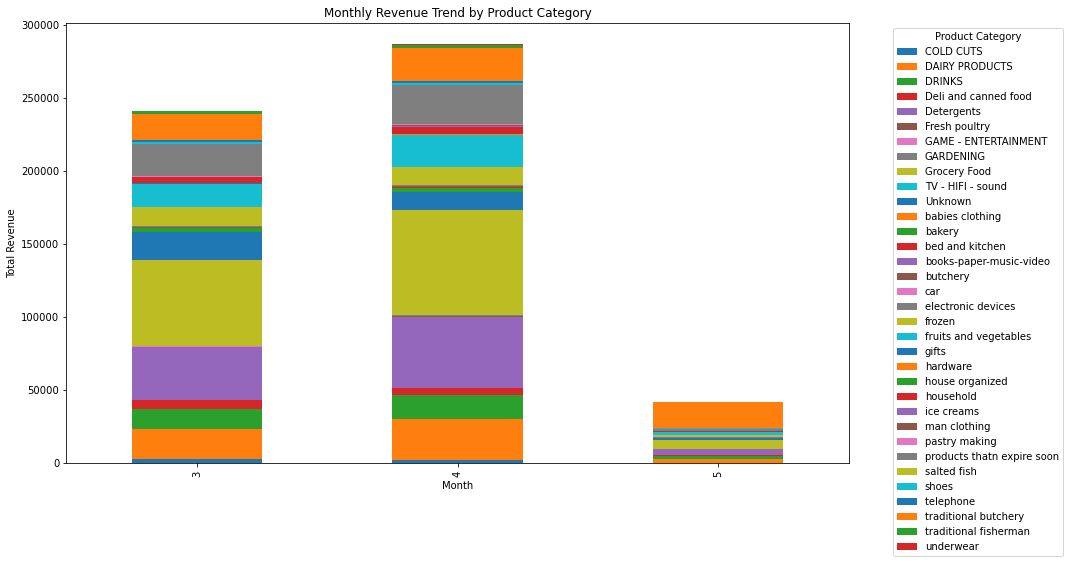

In [395]:
# Plot each category as a separate line
pivot_df2.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Monthly Revenue Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

In [ ]:
# This bar chart shows the monthly revenue trends by product category from January to March, with a small amount of data for 
#May.

# February recorded the highest total revenue, around 280,000 units, followed by March at about 250,000 units, and January at 
# roughly 200,000 units.
# Key product categories contributing significantly to revenue include:
# Grocery Food (yellow) and Dairy Products (blue), which consistently appear in high quantities across months.
# Fruits and Vegetables (light blue) and Bakery (orange) also show notable sales, especially in February and March.
# Other categories like Detergents and Books/Paper/Music/Video also contributed but in smaller amounts.
# Conclusion: The highest revenue-generating product categories are Grocery Food and Dairy Products, indicating consistent 
#demand.
#     The revenue seems to peak in February and March, suggesting these months may have increased customer spending or demand.
#     Further data for other months would help in identifying broader seasonal trends.

In [ ]:
# From the graph:

# March:

# The category "DAIRY PRODUCTS" generated the highest revenue, with sales around 250,000 units.
# "Grocery Food" and "Detergents" also contributed significantly, each with sales close to 150,000 units.
# April:

# "DAIRY PRODUCTS" continued to be the top category, generating approximately 275,000 units in revenue.
# "Grocery Food" and "Detergents" again were high contributors, with sales around 200,000 and 150,000 units, respectively.
# May:

# "babies clothing" was the leading category, with around 25,000 units in revenue.
# Other categories contributed minimally in May, reflecting a dip in overall sales.
# Conclusion
# "DAIRY PRODUCTS" consistently drove the highest revenue in March and April, with "Grocery Food" and "Detergents" 
# following closely. However, sales decreased considerably in May, with "babies clothing" as the top category, indicating 
# a significant drop in overall revenue across categories.

In [396]:
# continue from step 4 

In [ ]:
# time series , RFM , customer preference vs category , heatmap . Mission .

In [397]:
full_data2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Year,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash,2013,4,17,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,3,13,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,2013,4,24,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,2013,5,1,Wednesday


#### Identify Top and Bottom Revenue-Generating Categories.

#### step 1 : create df

In [398]:
# Extract relevant columns from full_data for analysis
category_revenue_df = full_data2[['Date', 'Sum_Units', 'Sum_Value', 'CategoryBDescription']].copy()

In [402]:
category_revenue_df.isnull().sum()

Date                    0
Sum_Units               0
Sum_Value               0
CategoryBDescription    0
dtype: int64

In [401]:
# Handle any unknown or missing values if necessary
category_revenue_df = category_revenue_df.dropna(subset=['CategoryBDescription'])

In [403]:
# Group by category to calculate total revenue per category
category_revenue_df = category_revenue_df.groupby('CategoryBDescription')['Sum_Value'].sum().reset_index()

In [404]:
# Rename columns for clarity
category_revenue_df.columns = ['Product Category', 'Total Revenue']

In [405]:
category_revenue_df.head()

,Product Category,Total Revenue
0,COLD CUTS,4934.090282
1,DAIRY PRODUCTS,51548.111861
2,DRINKS,32334.051764
3,Deli and canned food,11041.246732
4,Detergents,88567.073712


#### Step 2: Identify the Top Revenue-Generating Categories

In [406]:
# Sort the data to get top revenue-generating categories
top_categories = category_revenue_df.sort_values(by='Total Revenue', ascending=False).head(5)

In [407]:
# Display the top categories
top_categories

,Product Category,Total Revenue
8,Grocery Food,136311.251997
4,Detergents,88567.073712
31,traditional butchery,58193.625824
1,DAIRY PRODUCTS,51548.111861
27,products thatn expire soon,49415.560928


#### Step 3: Identify the Bottom Revenue-Generating Categories

In [408]:
# Sort the data to get bottom revenue-generating categories
bottom_categories = category_revenue_df.sort_values(by='Total Revenue').head(5)

In [409]:
bottom_categories

,Product Category,Total Revenue
9,TV - HIFI - sound,11.000030
11,babies clothing,95.079940
25,man clothing,95.200000
16,car,96.729950
20,gifts,131.720089


#### Step 4: Visualize the Top and Bottom Revenue-Generating Categories

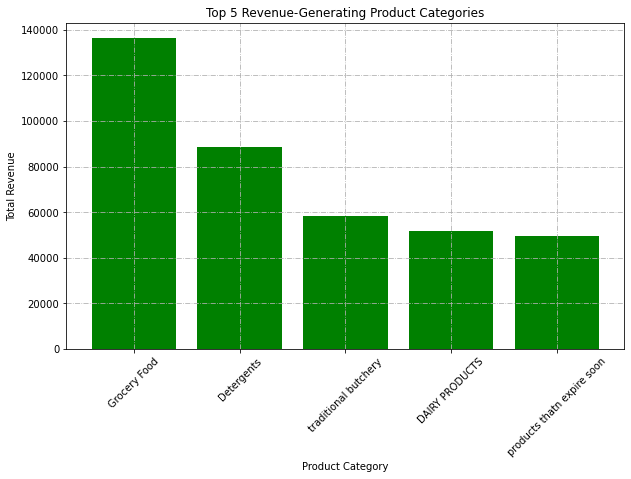

In [412]:
# Plot top revenue-generating categories
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Product Category'], top_categories['Total Revenue'], color='green')
plt.title('Top 5 Revenue-Generating Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.grid(linestyle='-.')
plt.xticks(rotation=45)
plt.show()

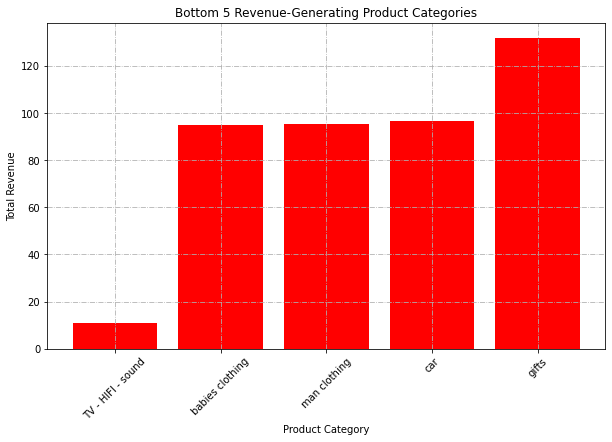

In [413]:
# Plot bottom revenue-generating categories
plt.figure(figsize=(10, 6))
plt.bar(bottom_categories['Product Category'], bottom_categories['Total Revenue'], color='red')
plt.title('Bottom 5 Revenue-Generating Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.grid(linestyle='-.')
plt.xticks(rotation=45)
plt.show()

### Plot Monthly Revenue Trend for the Highest Revenue Category 

In [414]:
category_revenue_df.head()

,Product Category,Total Revenue
0,COLD CUTS,4934.090282
1,DAIRY PRODUCTS,51548.111861
2,DRINKS,32334.051764
3,Deli and canned food,11041.246732
4,Detergents,88567.073712


In [415]:
# Step 1: Identify the highest revenue category
highest_revenue_category = category_revenue_df.loc[category_revenue_df['Total Revenue'].idxmax(), 'Product Category']

In [416]:
# Step 2: Filter data for the highest revenue category from full_data
highest_category_data = full_data2[full_data2['CategoryBDescription'] == highest_revenue_category]

In [ ]:
# Step 3: Add a 'Month' column to get the monthly revenue
highest_category_data['Month'] = pd.to_datetime(highest_category_data['Date']).dt.month

In [418]:
# Step 4: Group by 'Month' to calculate total monthly revenue
monthly_revenue_trend = highest_category_data.groupby('Month')['Sum_Value'].sum().reset_index()

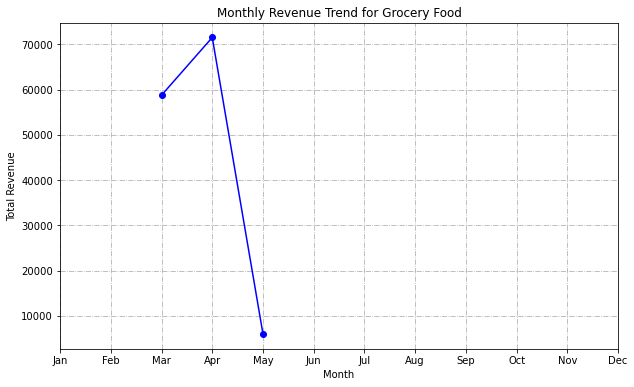

In [419]:
# Step 5: Plot the monthly revenue trend for the highest revenue category
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_trend['Month'], monthly_revenue_trend['Sum_Value'], marker='o', color='b')
plt.title(f'Monthly Revenue Trend for {highest_revenue_category}')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(linestyle='-.')
plt.show()

In [ ]:
Step 7: Seasonal Analysis by Month for Each Category

### Step 6: Forecast Future Sales for the Top Category Using SARIMAX

In [428]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [430]:
# Fit SARIMAX model without seasonality (order=(1,1,1), seasonal_order=(0,0,0,0))
model = SARIMAX(monthly_revenue_trend, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sarimax_result = model.fit()

In [431]:
# Forecast for the next 12 months
forecast = sarimax_result.get_forecast(steps=12)
forecast_index = forecast.predicted_mean.index

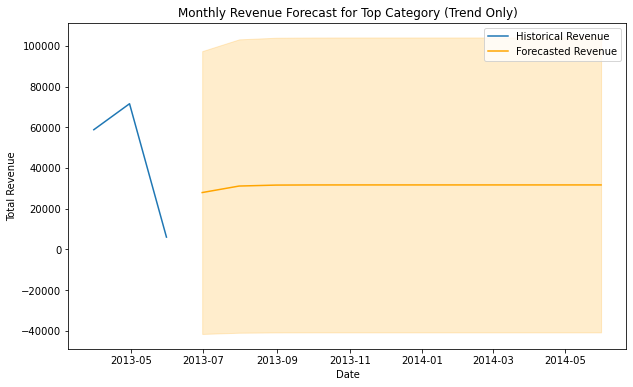

In [432]:
# Plot the forecasted values along with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_trend, label='Historical Revenue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Revenue', color='orange')
plt.fill_between(forecast_index, 
                 forecast.conf_int()['lower Sum_Value'], 
                 forecast.conf_int()['upper Sum_Value'], 
                 color='orange', alpha=0.2)
plt.title('Monthly Revenue Forecast for Top Category (Trend Only)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

#### N.B :-  the SARIMAX model is not able to generalize and predict variations, so it defaults to a flat trend with constant prediction

#### Seasonal Analysis by Month for Each Category

In [434]:
#: Group by 'Month' and 'CategoryBDescription' to calculate average monthly revenue for each category
monthly_seasonal_data = full_data2.groupby(['Month', 'CategoryBDescription'])['Sum_Value'].mean().reset_index()

In [435]:
# : Pivot the data for easier plotting (categories as columns, months as rows)
seasonal_pivot = monthly_seasonal_data.pivot(index='Month', columns='CategoryBDescription', values='Sum_Value')

<Figure size 1008x576 with 0 Axes>

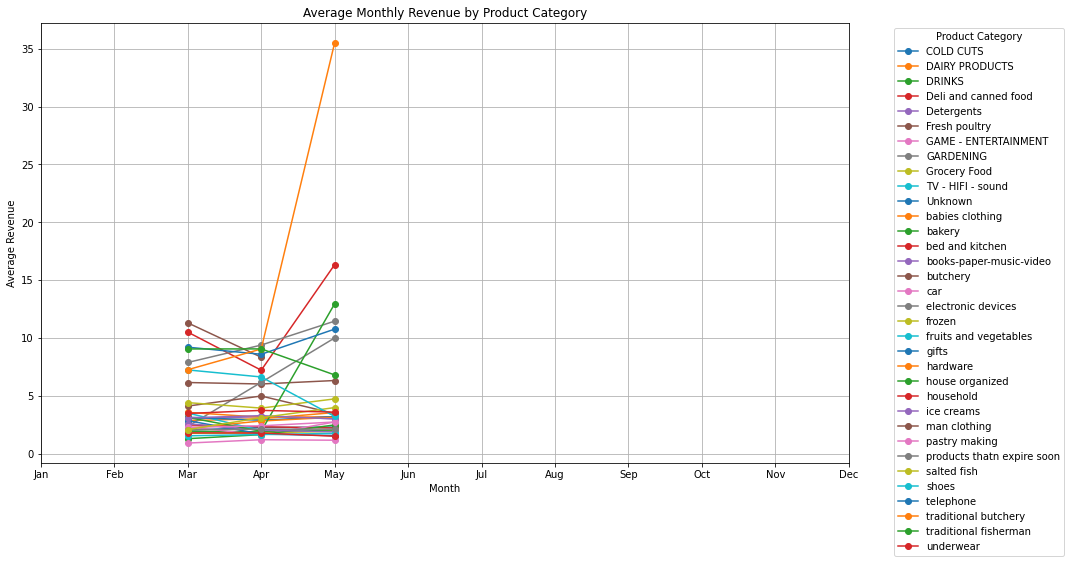

In [439]:
# : Plot the seasonal revenue patterns for each category
plt.figure(figsize=(14, 8))
seasonal_pivot.plot(kind='line', marker='o', figsize=(15, 8));
# Customize plot labels and title
plt.title("Average Monthly Revenue by Product Category")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### weekly analysis :--

In [442]:
# Group by day of the week and category, summing the revenue
weekly_trend = full_data2.groupby(['Day_of_Week', 'CategoryBDescription'])['Sum_Value'].sum().reset_index()

In [443]:
weekly_trend.head()

,Day_of_Week,CategoryBDescription,Sum_Value
0,Friday,COLD CUTS,830.701455
1,Friday,DAIRY PRODUCTS,8482.689966
2,Friday,DRINKS,5438.661909
3,Friday,Deli and canned food,1889.045697
4,Friday,Detergents,15555.790267


In [444]:
# Order the days of the week chronologically
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_trend['Day_of_Week'] = pd.Categorical(weekly_trend['Day_of_Week'], categories=days_order, ordered=True)
weekly_trend = weekly_trend.sort_values('Day_of_Week')

In [445]:
weekly_trend.head()

,Day_of_Week,CategoryBDescription,Sum_Value
65,Monday,underwear,139.850183
36,Monday,Deli and canned food,1379.780780
37,Monday,Detergents,14114.970237
38,Monday,Fresh poultry,167.656698
39,Monday,GAME - ENTERTAINMENT,30.660249


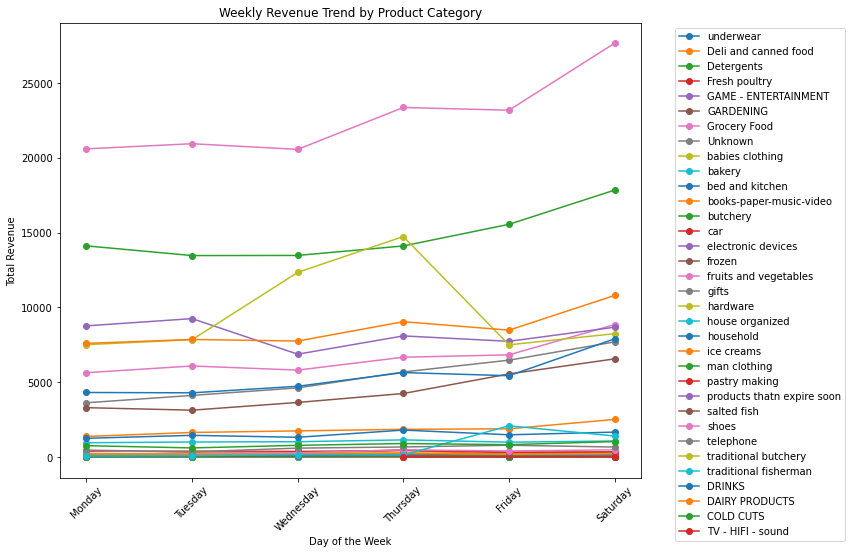

In [446]:
# : Plot Weekly Seasonal Trend
plt.figure(figsize=(12, 8))
for category in weekly_trend['CategoryBDescription'].unique():
    category_data = weekly_trend[weekly_trend['CategoryBDescription'] == category]
    plt.plot(category_data['Day_of_Week'], category_data['Sum_Value'], marker='o', label=category)

plt.title('Weekly Revenue Trend by Product Category')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [447]:
full_data2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Year,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash,2013,4,17,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,3,13,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,2013,4,24,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,2013,5,1,Wednesday


In [448]:
full_data2.shape

(236086, 17)

## RFM Modelling for Customer Segmentation :--

#### Step 1: Prepare a New Dataframe for RFM Analysis

In [ ]:
# Card_ID (to identify each customer)
# Date (to determine recency)
# Sum_Value (to calculate total monetary value for each customer)

In [452]:
full_data2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Year,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash,2013,4,17,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,3,13,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,2013,4,24,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,2013,5,1,Wednesday


In [467]:
full_data2.shape

(236086, 17)

In [453]:
# Create a new dataframe for RFM analysis by selecting necessary columns
rfm_data = full_data2[['Card_ID', 'Date', 'Sum_Value']]

In [455]:
rfm_data.head()

,Card_ID,Date,Sum_Value
0,9.160004e+12,2013-04-15,1.960000
1,9.164002e+12,2013-04-17,5.349993
2,9.164013e+12,2013-03-13,1.740015
3,9.162006e+12,2013-04-24,0.749817
4,9.161004e+12,2013-05-01,0.600000


In [468]:
rfm_data.shape

(236086, 3)

#### Step 2: Calculate RFM Metrics

In [ ]:
# Recency: Calculate the number of days since the last purchase.
# Frequency: Count the total number of purchases.
# Monetary: Sum the total spending

In [456]:
import datetime as dt

In [457]:
# Set the 'snapshot date' for recency calculation as the last date in our dataset
snapshot_date = rfm_data['Date'].max() + dt.timedelta(days=1)

In [458]:
# Group by Card_ID to calculate RFM metrics
rfm_metrics = rfm_data.groupby('Card_ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Card_ID': 'count',                                # Frequency
    'Sum_Value': 'sum'                                 # Monetary
}).rename(columns={'Date': 'Recency', 'Card_ID': 'Frequency', 'Sum_Value': 'Monetary'})

In [466]:
rfm_metrics.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Card_ID,,,,,,,,
9.160000e+12,2,36,195.709229,4,3,4,434,11
9.160000e+12,1,21,225.614207,4,3,4,434,11
9.160000e+12,7,2,147.894409,3,1,4,314,8
9.160000e+12,32,41,129.671166,1,3,4,134,8
9.160000e+12,2,17,38.923346,4,2,2,422,8


#### Step 3: Assign RFM Scores

In [460]:
# Divide Recency, Frequency, and Monetary into quartiles and assign scores
rfm_metrics['R_Score'] = pd.qcut(rfm_metrics['Recency'], 4, labels=[4, 3, 2, 1])
rfm_metrics['F_Score'] = pd.qcut(rfm_metrics['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_metrics['M_Score'] = pd.qcut(rfm_metrics['Monetary'], 4, labels=[1, 2, 3, 4])

In [461]:
# Combine R, F, M scores to create an RFM segment (e.g., "444" is high-value segment)
rfm_metrics['RFM_Segment'] = rfm_metrics['R_Score'].astype(str) + rfm_metrics['F_Score'].astype(str) + rfm_metrics['M_Score'].astype(str)
rfm_metrics['RFM_Score'] = rfm_metrics[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [464]:
rfm_metrics.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Card_ID,,,,,,,,
9.160000e+12,2,36,195.709229,4,3,4,434,11
9.160000e+12,1,21,225.614207,4,3,4,434,11
9.160000e+12,7,2,147.894409,3,1,4,314,8
9.160000e+12,32,41,129.671166,1,3,4,134,8
9.160000e+12,2,17,38.923346,4,2,2,422,8


#### Step 4: Merge RFM Data with Demographics

In [469]:
# We’ll add demographic information from loyalty_df to analyze preferences.

In [470]:
loyalty_df.head()

,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0
1,9164011076155,72.0,Female,Unknown,2.0,0.0
2,9162001049684,60.0,Female,Unknown,1.0,0.0
3,9162005608405,48.0,Female,Married,5.0,0.0
4,9163002257856,50.0,Female,Unknown,1.0,0.0


In [473]:
loyalty_df.MaritalStatus.value_counts()

Unknown            153384
Married             28552
Single (Alone)       6109
Single (Family)      2028
Divorced              668
Widow/Widower         387
Name: MaritalStatus, dtype: int64

In [471]:
loyalty_df.shape

(191128, 6)

In [476]:
# Reset index to make Card_ID a column in rfm_metrics
rfm_metrics = rfm_metrics.reset_index()

In [477]:
# Convert Card_ID to string if necessary to ensure consistency across merges
rfm_metrics['Card_ID'] = rfm_metrics['Card_ID'].astype(str)
loyalty_df['Card_ID'] = loyalty_df['Card_ID'].astype(str)

In [495]:
# Now merge with demographic data from loyalty_df
rfm_demographics2 = pd.merge(
    rfm_metrics, 
    loyalty_df[['Card_ID', 'Age', 'Gender', 'HouseholdSize', 'Children']], 
    on='Card_ID', 
    how='left'
)

In [496]:
rfm_demographics2.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children
0,9160000047700.0,2,36,195.709229,4,3,4,434,11,15,NaN,NaN,NaN,NaN
1,9160000072177.0,1,21,225.614207,4,3,4,434,11,15,NaN,NaN,NaN,NaN
2,9160000108180.0,7,2,147.894409,3,1,4,314,8,15,NaN,NaN,NaN,NaN
3,9160000137227.0,32,41,129.671166,1,3,4,134,8,15,NaN,NaN,NaN,NaN
4,9160000168443.0,2,17,38.923346,4,2,2,422,8,15,NaN,NaN,NaN,NaN


In [497]:
rfm_demographics2.shape

(4399, 14)

In [498]:
# Trim spaces and ensure Card_ID is a string in both dataframes
rfm_metrics['Card_ID'] = rfm_metrics['Card_ID'].str.strip()
loyalty_df['Card_ID'] = loyalty_df['Card_ID'].str.strip()


In [499]:
# Display unique values from both dataframes to verify overlap
print("Unique Card_IDs in rfm_metrics:", rfm_metrics['Card_ID'].unique()[:5])
print("Unique Card_IDs in loyalty_df:", loyalty_df['Card_ID'].unique()[:5])


Unique Card_IDs in rfm_metrics: ['9160000047700.0' '9160000072177.0' '9160000108180.0' '9160000137227.0'
 '9160000168443.0']
Unique Card_IDs in loyalty_df: ['9162002273446' '9164011076155' '9162001049684' '9162005608405'
 '9163002257856']


In [500]:
# Inner join to see if there are any matching Card_IDs
matched_df = pd.merge(rfm_metrics, loyalty_df[['Card_ID', 'Age', 'Gender', 'HouseholdSize', 'Children']], on='Card_ID', how='inner')
print("Number of matched records:", len(matched_df))



Number of matched records: 0


In [487]:
# Calculate the length of each Card_ID
rfm_metrics['Card_ID_Length'] = rfm_metrics['Card_ID'].astype(str).apply(len)
loyalty_df['Card_ID_Length'] = loyalty_df['Card_ID'].astype(str).apply(len)




In [489]:
rfm_metrics

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length
0,9160000047700.0,2,36,195.709229,4,3,4,434,11,15
1,9160000072177.0,1,21,225.614207,4,3,4,434,11,15
2,9160000108180.0,7,2,147.894409,3,1,4,314,8,15
3,9160000137227.0,32,41,129.671166,1,3,4,134,8,15
4,9160000168443.0,2,17,38.923346,4,2,2,422,8,15
...,...,...,...,...,...,...,...,...,...,...
4394,9164017704649.0,6,6,16.340015,3,1,1,311,5,15
4395,9164017711777.0,2,20,33.427939,4,3,2,432,9,15
4396,9164017716109.0,1,1,2.730007,4,1,1,411,6,15
4397,9164017898218.0,18,6,12.391577,2,1,1,211,4,15


In [492]:
 rfm_metrics['Card_ID_Length'].unique()

array([15], dtype=int64)

In [493]:
loyalty_df

,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children,Card_ID_Length
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0,13
1,9164011076155,72.0,Female,Unknown,2.0,0.0,13
2,9162001049684,60.0,Female,Unknown,1.0,0.0,13
3,9162005608405,48.0,Female,Married,5.0,0.0,13
4,9163002257856,50.0,Female,Unknown,1.0,0.0,13
...,...,...,...,...,...,...,...
191124,9160000248237,75.0,Male,Married,1.0,0.0,13
191125,9162008409016,49.0,Female,Married,4.0,2.0,13
191126,9164011002963,48.0,Unknown,Unknown,0.0,0.0,13
191127,9161003772316,48.0,Female,Unknown,1.0,0.0,13


In [494]:
loyalty_df['Card_ID_Length'].unique()

array([13], dtype=int64)

In [488]:
# Display unique lengths of Card_ID in each dataframe
print("Unique lengths of Card_ID in rfm_metrics:", rfm_metrics['Card_ID_Length'].unique())
print("Unique lengths of Card_ID in loyalty_df:", loyalty_df['Card_ID_Length'].unique())

Unique lengths of Card_ID in rfm_metrics: [15]
Unique lengths of Card_ID in loyalty_df: [13]


In [501]:
#------------------------------------------------------------------------------------------------------------------------

In [502]:
rfm_metrics.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length
0,9160000047700.0,2,36,195.709229,4,3,4,434,11,15
1,9160000072177.0,1,21,225.614207,4,3,4,434,11,15
2,9160000108180.0,7,2,147.894409,3,1,4,314,8,15
3,9160000137227.0,32,41,129.671166,1,3,4,134,8,15
4,9160000168443.0,2,17,38.923346,4,2,2,422,8,15


In [503]:
rfm_metrics2 = rfm_metrics # just taking backup of RFM data 

In [506]:
rfm_metrics2.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length
0,9160000047700,2,36,195.709229,4,3,4,434,11,15
1,9160000072177,1,21,225.614207,4,3,4,434,11,15
2,9160000108180,7,2,147.894409,3,1,4,314,8,15
3,9160000137227,32,41,129.671166,1,3,4,134,8,15
4,9160000168443,2,17,38.923346,4,2,2,422,8,15


In [505]:
# Step 1: Convert Card_ID in rfm_metrics to string and remove the decimal part
rfm_metrics2['Card_ID'] = rfm_metrics2['Card_ID'].astype(str).str.split('.').str[0]

In [512]:
rfm_metrics2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Card_ID         4399 non-null   object  
 1   Recency         4399 non-null   int64   
 2   Frequency       4399 non-null   int64   
 3   Monetary        4399 non-null   float64 
 4   R_Score         4399 non-null   category
 5   F_Score         4399 non-null   category
 6   M_Score         4399 non-null   category
 7   RFM_Segment     4399 non-null   object  
 8   RFM_Score       4399 non-null   int64   
 9   Card_ID_Length  4399 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(2)
memory usage: 254.2+ KB


In [507]:
loyalty_df.head()

,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children,Card_ID_Length
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0,13
1,9164011076155,72.0,Female,Unknown,2.0,0.0,13
2,9162001049684,60.0,Female,Unknown,1.0,0.0,13
3,9162005608405,48.0,Female,Married,5.0,0.0,13
4,9163002257856,50.0,Female,Unknown,1.0,0.0,13


In [508]:
loyalty_df2 = loyalty_df # just taking backup of the loyalty data

In [509]:
loyalty_df2.head()

,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children,Card_ID_Length
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0,13
1,9164011076155,72.0,Female,Unknown,2.0,0.0,13
2,9162001049684,60.0,Female,Unknown,1.0,0.0,13
3,9162005608405,48.0,Female,Married,5.0,0.0,13
4,9163002257856,50.0,Female,Unknown,1.0,0.0,13


In [510]:
# Step 2: Ensure Card_ID in loyalty_df is also a string
loyalty_df2['Card_ID'] = loyalty_df2['Card_ID'].astype(str)

In [511]:
loyalty_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191128 entries, 0 to 191128
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Card_ID         191128 non-null  object 
 1   Age             191128 non-null  float64
 2   Gender          191128 non-null  object 
 3   MaritalStatus   191128 non-null  object 
 4   HouseholdSize   191128 non-null  float64
 5   Children        191128 non-null  float64
 6   Card_ID_Length  191128 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.7+ MB


In [513]:
# Step 3: Perform the merge after cleaning Card_ID
rfm_demographics3 = pd.merge(rfm_metrics2, loyalty_df2[['Card_ID', 'Age', 'Gender', 'HouseholdSize', 'Children']], on='Card_ID', how='left')


In [514]:
rfm_demographics3.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children
0,9160000047700,2,36,195.709229,4,3,4,434,11,15,48.0,Male,1.0,0.0
1,9160000072177,1,21,225.614207,4,3,4,434,11,15,38.0,Male,2.0,1.0
2,9160000108180,7,2,147.894409,3,1,4,314,8,15,42.0,Male,5.0,2.0
3,9160000137227,32,41,129.671166,1,3,4,134,8,15,35.0,Female,4.0,2.0
4,9160000168443,2,17,38.923346,4,2,2,422,8,15,40.0,Male,3.0,0.0


#### Step 5: Analyze Product Category Preferences by Demographics

In [515]:
rfm_demographics3new = rfm_demographics3 # just taking backup of rfmdemographics dataframe

In [516]:
rfm_demographics3new.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children
0,9160000047700,2,36,195.709229,4,3,4,434,11,15,48.0,Male,1.0,0.0
1,9160000072177,1,21,225.614207,4,3,4,434,11,15,38.0,Male,2.0,1.0
2,9160000108180,7,2,147.894409,3,1,4,314,8,15,42.0,Male,5.0,2.0
3,9160000137227,32,41,129.671166,1,3,4,134,8,15,35.0,Female,4.0,2.0
4,9160000168443,2,17,38.923346,4,2,2,422,8,15,40.0,Male,3.0,0.0


In [517]:
rfm_demographics3new.shape

(4399, 14)

#### Product category preferences by Age of customers 

In [518]:
# Create age groups
rfm_demographics3new['Age_Group'] = pd.cut(rfm_demographics3new['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Under 18', '18-35', '36-50', '51-65', '65+'])


In [519]:
rfm_demographics3new.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children,Age_Group
0,9160000047700,2,36,195.709229,4,3,4,434,11,15,48.0,Male,1.0,0.0,36-50
1,9160000072177,1,21,225.614207,4,3,4,434,11,15,38.0,Male,2.0,1.0,36-50
2,9160000108180,7,2,147.894409,3,1,4,314,8,15,42.0,Male,5.0,2.0,36-50
3,9160000137227,32,41,129.671166,1,3,4,134,8,15,35.0,Female,4.0,2.0,18-35
4,9160000168443,2,17,38.923346,4,2,2,422,8,15,40.0,Male,3.0,0.0,36-50


In [526]:
rfm_demographics3new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4399 entries, 0 to 4398
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Card_ID         4399 non-null   object  
 1   Recency         4399 non-null   int64   
 2   Frequency       4399 non-null   int64   
 3   Monetary        4399 non-null   float64 
 4   R_Score         4399 non-null   category
 5   F_Score         4399 non-null   category
 6   M_Score         4399 non-null   category
 7   RFM_Segment     4399 non-null   object  
 8   RFM_Score       4399 non-null   int64   
 9   Card_ID_Length  4399 non-null   int64   
 10  Age             4399 non-null   float64 
 11  Gender          4399 non-null   object  
 12  HouseholdSize   4399 non-null   float64 
 13  Children        4399 non-null   float64 
 14  Age_Group       4399 non-null   category
dtypes: category(4), float64(4), int64(4), object(3)
memory usage: 430.4+ KB


In [523]:
# Group by RFM_Segment and Age_Group to analyze category preferences
category_preferences = full_data2.groupby(['Card_ID', 'CategoryBDescription']).agg({'Sum_Value': 'sum'}).reset_index()

In [522]:
category_preferences.head()

,Card_ID,CategoryBDescription,Sum_Value
0,9.160000e+12,DAIRY PRODUCTS,2.831137
1,9.160000e+12,Detergents,1.100015
2,9.160000e+12,Grocery Food,26.270169
3,9.160000e+12,Unknown,16.239502
4,9.160000e+12,books-paper-music-video,2.280000


In [528]:
category_preferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30349 entries, 0 to 30348
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card_ID               30349 non-null  object 
 1   CategoryBDescription  30349 non-null  object 
 2   Sum_Value             30349 non-null  float64
dtypes: float64(1), object(2)
memory usage: 711.4+ KB


In [527]:
# Convert Card_ID to string in both dataframes, ensuring no decimal notation
category_preferences['Card_ID'] = category_preferences['Card_ID'].apply(lambda x: f"{int(x):013}")

In [ ]:

#rfm_demographics3new['Card_ID'] = rfm_demographics3new['Card_ID'].apply(lambda x: f"{int(x):013}")


In [529]:
# Merge with RFM and demographic data
category_preferences2 = pd.merge(category_preferences, rfm_demographics3new[['Card_ID', 'Age_Group', 'Gender', 'HouseholdSize', 'Children', 'RFM_Segment']], on='Card_ID', how='left')

In [530]:
category_preferences2.head()

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434
3,9160000047700,Unknown,16.239502,36-50,Male,1.0,0.0,434
4,9160000047700,books-paper-music-video,2.280000,36-50,Male,1.0,0.0,434


#### Step 6: Visualize Preferences Based on Age, Gender, Household, and Children

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\HARSH\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


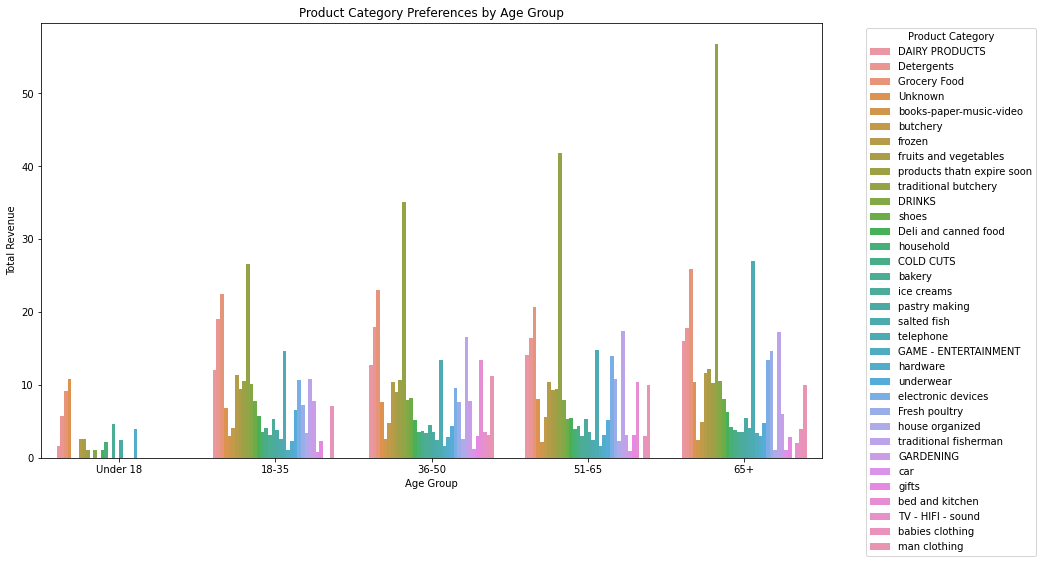

In [534]:
# Plot preferences by age group and product category
plt.figure(figsize=(14, 8))
sns.barplot(data=category_preferences2, x='Age_Group', y='Sum_Value', hue='CategoryBDescription', ci=None)
plt.title('Product Category Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

####  Calculate Total Revenue and Sales by Demographic Segments

In [535]:
rfm_demographics3new.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children,Age_Group
0,9160000047700,2,36,195.709229,4,3,4,434,11,15,48.0,Male,1.0,0.0,36-50
1,9160000072177,1,21,225.614207,4,3,4,434,11,15,38.0,Male,2.0,1.0,36-50
2,9160000108180,7,2,147.894409,3,1,4,314,8,15,42.0,Male,5.0,2.0,36-50
3,9160000137227,32,41,129.671166,1,3,4,134,8,15,35.0,Female,4.0,2.0,18-35
4,9160000168443,2,17,38.923346,4,2,2,422,8,15,40.0,Male,3.0,0.0,36-50


In [537]:
category_preferences2.head()

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434
3,9160000047700,Unknown,16.239502,36-50,Male,1.0,0.0,434
4,9160000047700,books-paper-music-video,2.280000,36-50,Male,1.0,0.0,434


In [540]:
# Merge with RFM and demographic data
category_preferences3new = pd.merge(category_preferences, rfm_demographics3new[['Card_ID', 'Age_Group', 'Gender', 'HouseholdSize', 'Children', 'RFM_Segment','Monetary','Age']], on='Card_ID', how='left')

In [541]:
category_preferences3new.head()

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment,Monetary,Age
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434,195.709229,48.0
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434,195.709229,48.0
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434,195.709229,48.0
3,9160000047700,Unknown,16.239502,36-50,Male,1.0,0.0,434,195.709229,48.0
4,9160000047700,books-paper-music-video,2.280000,36-50,Male,1.0,0.0,434,195.709229,48.0


In [542]:
category_preferences3new.shape

(30349, 10)

In [545]:
# Group by Age and Category to find revenue preferences by age
age_category_revenue2 = category_preferences3new.groupby(['Age_Group', 'CategoryBDescription'])['Monetary'].sum().unstack().fillna(0)

In [546]:

age_category_revenue2.head()  # Display a sample of the grouped data


CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
Age_Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Under 18,0.000000,12.071255,75.681086,15.060015,69.040470,0.000000,0.000000,0.000000,102.812355,0.000000,75.681086,0.000000,75.681086,0.000000,0.000000,0.000000,0.000000,0.000000,56.969215,75.681086,0.000000,12.071255,0.000000,75.681086,0.000000,0.000000,18.711871,18.711871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18-35,12794.170840,25937.013407,24590.328853,19568.583963,28523.914891,2388.352574,1144.488776,4336.216960,29724.456931,0.000000,25421.004541,608.610451,15133.290555,0.000000,5545.143241,3893.386326,120.260541,1049.721703,19527.537940,25611.132175,706.412266,3853.192304,886.149789,19053.368755,3133.014879,0.000000,6216.497055,26456.928154,1851.386288,2196.483874,4580.950108,15253.751172,2829.373435,1776.608921
36-50,101459.095862,229290.248397,203306.236648,148846.606871,241360.812633,12223.182710,16157.355909,19900.425528,258060.288396,261.673692,222976.587875,1926.869059,109756.346635,3409.215310,45241.330773,21295.774927,6462.996598,7294.731935,167557.791315,222951.795524,2446.628232,33936.849324,5837.380279,150159.023810,21251.032956,171.757710,45953.162459,228105.153381,10561.969665,24104.227342,18637.093244,137500.930282,24628.469555,18127.029930
51-65,14516.574906,35300.208422,27806.547251,21750.594135,35533.689392,2110.387265,2562.782833,3898.473426,38404.439534,0.000000,34234.855494,343.776230,17149.178358,636.842317,6208.080958,1728.084197,549.232838,595.284051,24852.944375,34477.404837,586.899367,5643.996245,1691.301187,22932.519232,2411.617372,94.928276,5418.640266,33098.332482,1934.422979,984.393601,2945.845397,22580.021284,5194.179110,2555.290154
65+,10857.109923,27791.827301,22528.149970,19304.230284,27917.115261,885.818637,1732.564581,3265.056638,30031.337527,164.381219,26979.078334,346.026148,12705.337249,0.000000,5904.927552,2376.628377,1259.938398,559.701983,22713.337913,27910.611832,95.032517,3144.561845,67.400176,13659.682591,1529.111866,227.585327,6684.731192,25737.371474,1523.675160,1811.330151,1310.408747,21140.374905,6698.283441,1383.482146


In [547]:
# This table shows total revenue for each product category based on age category

#### Step 2: Analyze Preferences by Gender

In [548]:
# Group by Gender and Category to find revenue preferences by gender
gender_category_revenue = category_preferences3new.groupby(['Gender', 'CategoryBDescription'])['Monetary'].sum().unstack().fillna(0)

In [549]:
gender_category_revenue.head()

CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fake Names,0.000000,186.785209,0.000000,0.000000,186.785209,0.000000,0.000000,0.000000,186.785209,0.000000,186.785209,0.000000,186.785209,0.000000,0.000000,0.000000,0.000000,0.000000,186.785209,186.785209,0.000000,0.000000,0.000000,186.785209,0.000000,0.000000,0.000000,186.785209,0.000000,186.785209,0.000000,0.000000,0.000000,0.000000
Female,85034.818780,177383.828084,152839.786260,120683.433766,186503.735219,11124.404149,11677.307798,15710.345673,197519.318951,225.531681,172111.007855,1704.648604,90930.703268,2528.902331,35057.055233,14499.332983,3583.599181,4366.001423,138504.144688,172184.862548,2323.229782,27832.787525,4382.517561,120362.487869,14581.447436,274.217109,39722.544221,172681.499980,9298.147039,14784.774404,15469.718624,105280.732941,23528.027402,14338.793953
Male,33812.064425,89779.665516,80196.743067,58309.661957,93273.615463,5222.757961,6767.611601,11929.556621,101191.045774,200.523229,88435.779639,966.715130,39899.893340,598.975075,15823.304788,8003.474711,3182.332764,4044.095912,61151.652975,88997.742128,582.069201,12670.759007,2670.987235,52645.282206,8156.873375,117.608276,20026.922429,89280.745042,6003.336049,7695.583827,7962.547063,58391.985682,8695.897983,5055.220956
Unknown,20780.068327,50981.089973,45270.414481,30491.979544,53440.436755,1260.579078,3152.272701,3760.270257,57426.184808,0.000000,48953.634627,553.918153,23802.452065,918.180220,12019.122503,6791.066133,1626.496431,1089.342337,34865.997885,49657.235569,929.673399,6087.124441,1428.726635,32685.720191,5586.456262,102.445928,4542.276192,51267.467132,569.971004,6429.291527,4042.031809,32802.359021,7126.380156,4448.396242


#### the total revenue for each product category based on gender

#### Step 3: Analyze Preferences by Household Size

In [550]:
# Group by HouseholdSize and Category to find revenue preferences by household size
household_category_revenue = category_preferences3new.groupby(['HouseholdSize', 'CategoryBDescription'])['Monetary'].sum().unstack().fillna(0)

In [551]:
household_category_revenue.head() 

CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
HouseholdSize,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,15637.887518,40153.618211,33896.491066,23838.859710,40900.992662,1260.579078,3016.629589,2788.412742,44206.947581,0.000000,38576.905932,520.107441,19997.464833,918.180220,10680.358948,5234.778144,1329.540247,111.591196,27086.159676,37589.516790,542.997302,5435.055796,1077.630669,25633.934886,4804.558476,0.000000,4069.451159,39192.942336,569.971004,5354.536221,3417.827554,25210.225377,5880.397647,3767.901217
1.0,80675.282797,182520.374863,160071.410475,117687.880783,191920.639046,10146.643401,11165.079224,17254.680591,204398.078270,261.673692,180781.275757,1539.765729,87883.069035,2857.038551,34714.264412,16000.236519,5300.552048,7370.476031,133215.239196,183060.310265,1465.755984,25412.442212,3992.604431,114424.784458,15145.488124,29.291739,39019.990475,179575.243049,7982.471194,14471.581320,13158.769525,115155.341715,20049.776240,13998.850821
2.0,10576.895612,23854.779991,21380.706972,16873.466265,24556.328607,957.858076,740.282731,2099.344978,26637.731833,0.000000,21203.169069,656.458576,8862.705070,241.698812,3744.318414,1480.936490,348.201086,238.543888,16616.600340,23305.938550,693.229901,3865.294874,47.222891,14940.669030,1871.085372,322.513603,5611.659610,23153.832411,1509.051973,1490.015909,1538.909636,14467.222726,4061.516361,2494.584483
3.0,15170.872572,31492.822819,28128.372126,23412.064646,33136.815630,2261.411152,3594.574588,5461.647777,35103.805448,164.381219,29922.972660,0.000000,17613.050648,13.840000,6023.431293,3799.601939,1121.623418,849.329537,25508.559182,29654.845383,989.164868,5831.034309,1599.336872,20799.461713,2636.749610,0.000000,8520.769892,31291.031419,3282.477426,5213.144452,4365.203195,18634.772237,5257.388324,1019.205811
4.0,14020.831027,31150.337499,27665.013347,22184.938569,32728.361803,2981.249481,2953.794478,3293.959334,35128.106042,0.000000,30695.192111,508.950141,15993.123220,15.300043,6097.150844,2714.372592,180.352458,723.844874,25740.429376,28940.994570,111.210887,4600.358824,1605.414176,23556.471551,3187.706034,142.465972,5848.498090,31546.178918,2455.688482,2227.779427,4307.867642,17035.171664,3717.613383,1886.850420


#### Step 4: Analyze Preferences by Number of Children

In [552]:
# Group by Children and Category to find revenue preferences by number of children
children_category_revenue = category_preferences3new.groupby(['Children', 'CategoryBDescription'])['Monetary'].sum().unstack().fillna(0)

In [553]:
children_category_revenue.head()

CategoryBDescription,COLD CUTS,DAIRY PRODUCTS,DRINKS,Deli and canned food,Detergents,Fresh poultry,GAME - ENTERTAINMENT,GARDENING,Grocery Food,TV - HIFI - sound,Unknown,babies clothing,bakery,bed and kitchen,books-paper-music-video,butchery,car,electronic devices,frozen,fruits and vegetables,gifts,hardware,house organized,household,ice creams,man clothing,pastry making,products thatn expire soon,salted fish,shoes,telephone,traditional butchery,traditional fisherman,underwear
Children,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,113122.844948,261530.993343,227615.237178,167105.876843,274444.564453,13071.581949,15371.347348,23447.778065,293500.809278,426.05491,255052.800028,2553.754666,122151.163866,4016.917583,50562.390280,24280.701264,7249.272751,8269.359320,187966.746336,256318.393009,3728.626263,36693.907219,5287.277771,164928.256443,22634.222468,374.485341,50748.813710,257979.505250,10840.549610,22487.476574,19727.544777,162263.970491,31712.626478,21068.955915
1.0,9648.557889,22935.102436,20858.478630,16753.011865,23508.499296,1260.596445,2198.743155,4017.547029,24693.515668,0.00000,21664.632232,162.577080,12940.052560,0.000000,4755.784332,1736.180746,1020.695406,469.290505,17927.173596,21918.453716,32.613441,3634.583471,1700.071753,16145.039129,1966.476305,0.000000,6043.098637,22507.098618,1373.446720,2593.064623,2066.406483,12671.101866,2980.884814,1519.434341
2.0,13931.032246,27171.203001,23621.327946,21327.355534,28225.867569,3275.562793,3084.425854,3765.021721,30320.281775,0.00000,26343.471382,373.539664,15800.576194,29.140043,6048.680298,3213.043674,122.460220,760.789847,23667.588835,26427.355509,73.732678,4631.222367,982.626443,19338.395454,3511.162907,17.340044,6222.399329,26907.417215,2301.683120,3777.139814,4341.992164,17280.773350,4331.042731,1089.221188
3.0,2660.333763,5574.860753,5133.116952,3786.165432,6179.880502,0.000000,942.675743,169.825737,6654.008750,0.00000,5683.274133,135.410477,3183.603050,0.000000,1357.558266,0.000000,0.000000,0.000000,4235.580514,5442.915660,0.000000,1630.957916,512.255464,4696.401497,212.915393,102.445928,880.552105,5329.004466,1355.774642,135.410477,1338.354071,3172.432753,325.751520,67.401526
4.0,264.182686,1119.209249,1078.783100,512.665593,1045.760827,0.000000,0.000000,0.000000,1154.719272,0.00000,943.029555,0.000000,744.438213,0.000000,175.069348,63.948143,0.000000,0.000000,911.491478,919.507560,0.000000,0.000000,0.000000,772.182952,0.000000,0.000000,396.879062,693.471814,0.000000,103.343479,0.000000,1086.799183,0.000000,97.398181


#### Step 5: Visualize Preferences by Age, Gender, Household Size, and Children

#### Bar Plot for Age Preferences

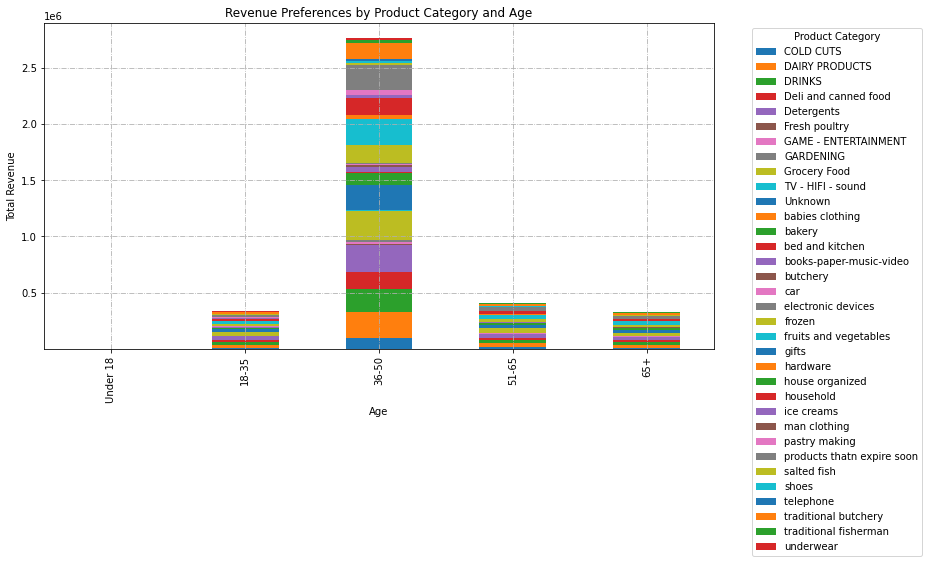

In [557]:
# Plot revenue preferences by Age
age_category_revenue2.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue Preferences by Product Category and Age')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.grid(linestyle='-.')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [562]:
# Analysis:
# Age Group 36-50:

# This age group has the highest revenue contribution across all categories, with total revenue reaching nearly 2.5 million.
# Top revenue-generating categories in this group include:
# Grocery Food
# DAIRY PRODUCTS
# Drinks
# Fresh Poultry
# These categories are popular among consumers aged 36-50, indicating that they spend the most on daily essentials and fresh 
# foods.
# Age Group 18-35:

# This group has moderate revenue, with contributions visible across various categories.
# Some preferred categories in this age group include TV - HIFI - sound, electronic devices, and Grocery Food.
# This may suggest that younger adults have diverse spending preferences but lean toward electronics and groceries.
# Age Groups 51-65 and 65+:

# These groups show smaller revenue contributions overall, likely because older adults might have lower spending needs 
# or preferences.
# Despite the lower overall spending, Grocery Food and DAIRY PRODUCTS remain consistently popular across these age groups,
# indicating essential spending.
# Under 18:

# This group shows minimal revenue, which is expected as they likely rely on family for purchases and have fewer spending needs.
# The revenue generated is spread thinly across various categories, indicating that there’s no strong preference in any 
# specific category.
# Key Insights:
# Grocery Food and DAIRY PRODUCTS are popular across all age groups, showing that they are essential items for everyone.
# Electronic Devices and TV - HIFI - sound are particularly popular among younger adults (18-35), possibly due to their 
# interest in technology and entertainment.
# The highest spending age group is 36-50, which contributes significantly across almost all categories, especially 
# essential items.
# This analysis can help tailor marketing strategies by age group. For example, focusing on essential products for older 
# groups while targeting electronics for younger adults could align with their preferences.
# Age Group 36-50:

# Estimated Revenue: Approximately 2.5 million
# This is the highest revenue-generating age group, with significant contributions across multiple categories.
# Age Group 18-35:

# Estimated Revenue: Approximately 0.5 million
# This age group has moderate revenue contributions, with noticeable spending in categories like electronics and Grocery Food.
# Age Group 51-65:

# Estimated Revenue: Approximately 0.2 million
# Revenue contribution is lower than the 18-35 age group, with spending primarily on essential categories.
# Age Group 65+:

# Estimated Revenue: Approximately 0.15 million
# Similar to the 51-65 age group, spending is focused on essential items, with lower overall revenue.
# Under 18:

# Estimated Revenue: Minimal, around 0.05 million or less
# This age group has the lowest spending, which is spread across various categories without any specific focus.

#### Bar Plot for gender Preferences

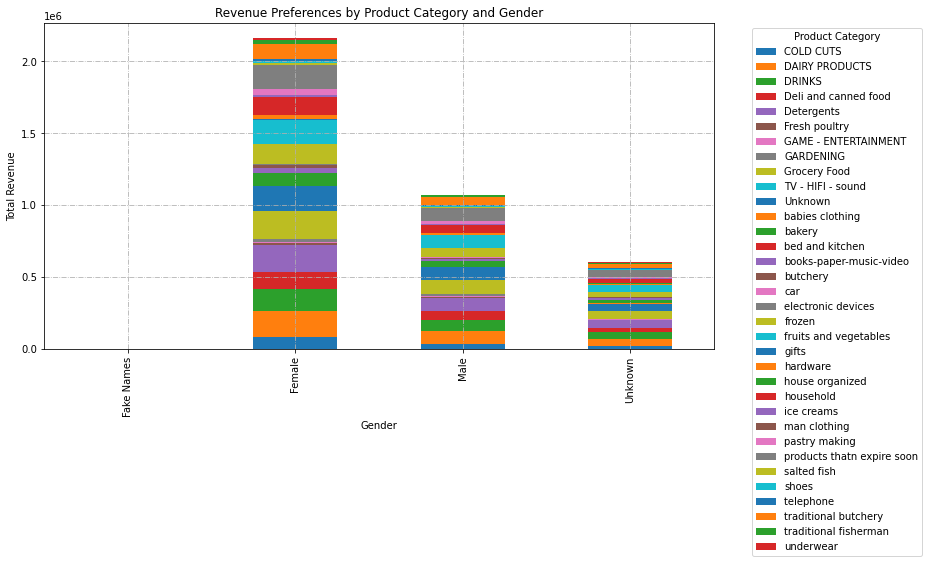

In [556]:
# Plot revenue preferences by gender
gender_category_revenue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue Preferences by Product Category and Gender')
plt.xlabel('Gender')
plt.grid(linestyle='-.')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [565]:
category_preferences3new.head()

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment,Monetary,Age
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434,195.709229,48.0
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434,195.709229,48.0
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434,195.709229,48.0
3,9160000047700,Unknown,16.239502,36-50,Male,1.0,0.0,434,195.709229,48.0
4,9160000047700,books-paper-music-video,2.280000,36-50,Male,1.0,0.0,434,195.709229,48.0


In [566]:
category_preferences3new.Gender.unique()

array(['Male', 'Female', 'Unknown', 'Fake Names'], dtype=object)

In [567]:
# Filter out entries with "Fake Names" in the Gender column
category_preferences_filtered2 = category_preferences3new[category_preferences3new['Gender'] != 'Fake Names']

<Figure size 864x576 with 0 Axes>

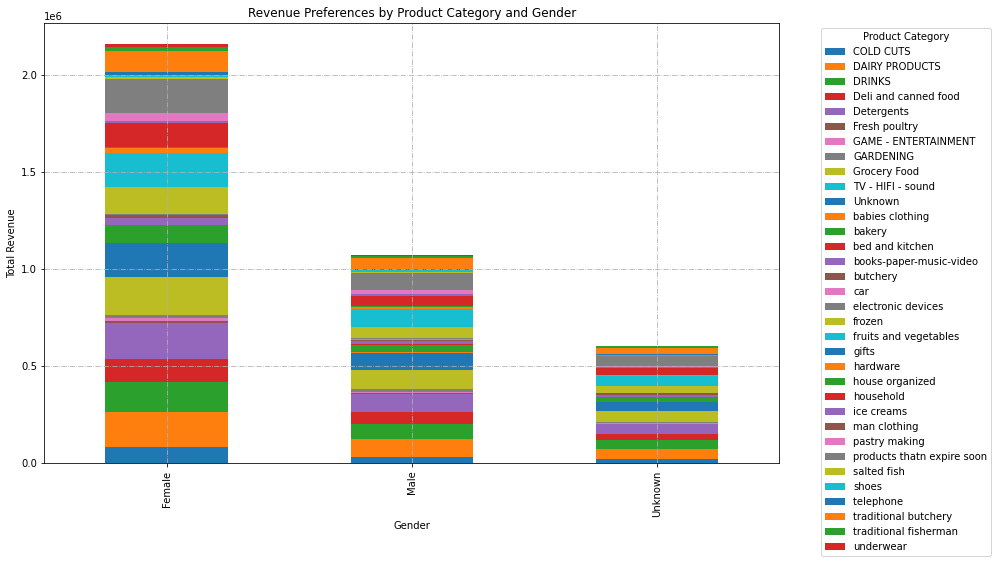

In [570]:
# Plot the filtered data
plt.figure(figsize=(12, 8))
category_preferences_filtered2.groupby(['Gender', 'CategoryBDescription'])['Monetary'].sum().unstack().plot(
    kind='bar', stacked=True, figsize=(14, 8)
)
plt.title('Revenue Preferences by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.grid(linestyle='-.')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [571]:
# In this graph, we see the total revenue generated by each product category segmented by gender (Female, Male, and Unknown).
# Here are the key insights:

# Female:

# Top Categories: The highest revenue categories among female customers include "Grocery Food," "DAIRY PRODUCTS," and
#     "DRINKS."
# Revenue:
# Grocery Food contributes significantly to revenue, exceeding 200,000 units.
# DAIRY PRODUCTS and DRINKS also contribute prominently, with revenues above 150,000 each.
# Total Revenue: Female customers collectively contribute over 2 million in total revenue across all categories.
# Male:

# Top Categories: The primary revenue-generating categories for males are "Grocery Food," "DAIRY PRODUCTS," and "Detergents."
# Revenue:
# Grocery Food leads, contributing around 150,000 units in revenue.
# DAIRY PRODUCTS and Detergents each generate around 100,000.
# Total Revenue: Male customers contribute approximately 1 million in total revenue.
# Unknown Gender:

# Top Categories: The categories generating the most revenue for the "Unknown" gender are "Grocery Food," "DAIRY PRODUCTS,"
#     and "DRINKS."
# Revenue:
# Grocery Food contributes around 50,000 units.
# DAIRY PRODUCTS and DRINKS generate slightly less, each around 30,000-40,000.
# Total Revenue: This group has the lowest revenue contribution, under 500,000 in total.
# Conclusion:
# Across all genders, "Grocery Food" consistently appears as the top revenue generator.
# Females contribute the most revenue, with "Grocery Food," "DAIRY PRODUCTS," and "DRINKS" being their preferred categories.
# Males also show strong preferences for "Grocery Food" and "DAIRY PRODUCTS," though with slightly lower overall spending
# compared to females.
# The "Unknown" group has lower revenue, but "Grocery Food" remains the top category among this group as well.
# This analysis indicates that "Grocery Food" is a universally high-performing category, and targeting female customers with
# products in "DAIRY PRODUCTS" and "DRINKS" might enhance revenue even further.

#### Bar Plot for Household Size Preferences

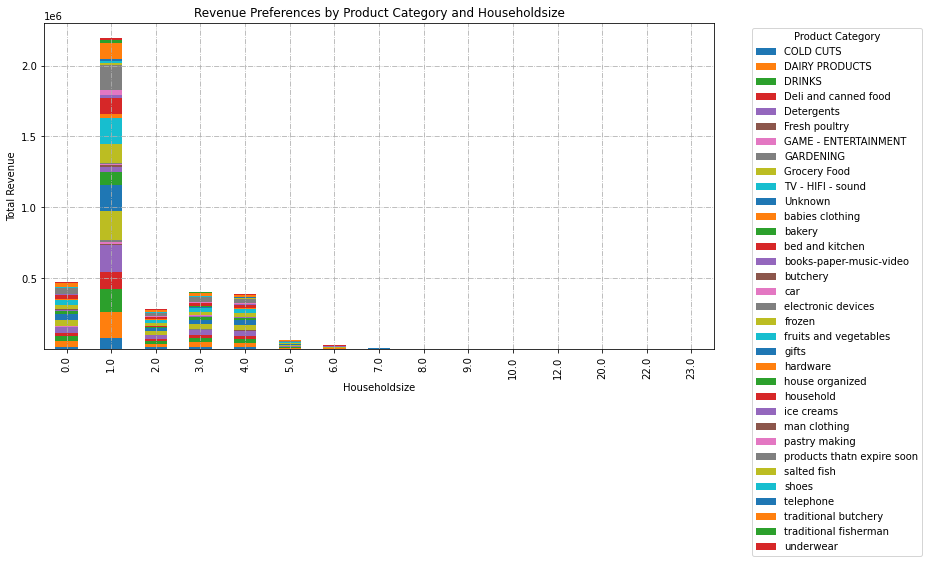

In [558]:
# Plot revenue preferences by Householdsize
household_category_revenue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue Preferences by Product Category and Householdsize')
plt.xlabel('Householdsize')
plt.grid(linestyle='-.')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [575]:
# Filter the data to include only household sizes from 1 to 7
filtered_category_preferences3 = category_preferences3new[(category_preferences3new['HouseholdSize'] >= 1) & (category_preferences3new['HouseholdSize'] <7)]


In [576]:
filtered_category_preferences3.head(2)

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment,Monetary,Age
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434,195.709229,48.0
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434,195.709229,48.0


<Figure size 864x1440 with 0 Axes>

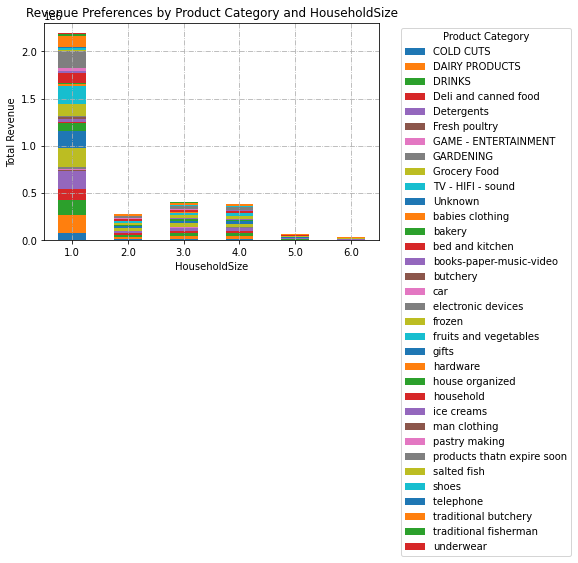

In [581]:

# Plot the filtered data
plt.figure(figsize=(12, 20))
filtered_category_preferences3.pivot_table(values='Monetary', index='HouseholdSize', columns='CategoryBDescription', aggfunc='sum').plot(kind='bar', stacked=True)
plt.title('Revenue Preferences by Product Category and HouseholdSize')
plt.xlabel('HouseholdSize')
plt.ylabel('Total Revenue')
plt.grid(linestyle='-.')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


In [582]:
# Household Size of 1:

# Total Revenue: Over 2 million.
# Grocery Food: Approximately 0.5 million.
# DAIRY PRODUCTS: Around 0.4 million.
# DRINKS: Roughly 0.3 million.
# Detergents: Around 0.2 million.
# Fresh poultry: About 0.15 million.
# Household Size of 2:

# Total Revenue: Approximately 0.5 million.
# DAIRY PRODUCTS: Around 0.15 million.
# Grocery Food: Roughly 0.1 million.
# DRINKS: About 0.08 million.
# Detergents: Approximately 0.05 million.
# Household Size of 3:

# Total Revenue: Just under 0.5 million.
# Grocery Food: Around 0.1 million.
# DAIRY PRODUCTS: Approximately 0.08 million.
# DRINKS: Roughly 0.05 million.
# Household Size of 4:

# Total Revenue: Around 0.2 million.
# Grocery Food: Roughly 0.05 million.
# DAIRY PRODUCTS: Approximately 0.03 million.
# Household Size of 5 and above:

# Total Revenue: Significantly lower, under 0.1 million each.
# Popular Categories: "Grocery Food" and "DAIRY PRODUCTS" still appear but with much smaller contributions.
# Key Takeaways
# Household Size 1 generates the majority of the revenue across all categories, especially in essentials like
# "Grocery Food," "DAIRY PRODUCTS," and "DRINKS."
# As household size increases, revenue contribution decreases, with a noticeable drop in preference for non-essential 
# categories.
# These insights show that targeting single-member households with essential items could maximize revenue.

#### Bar Plot for Children Preferences

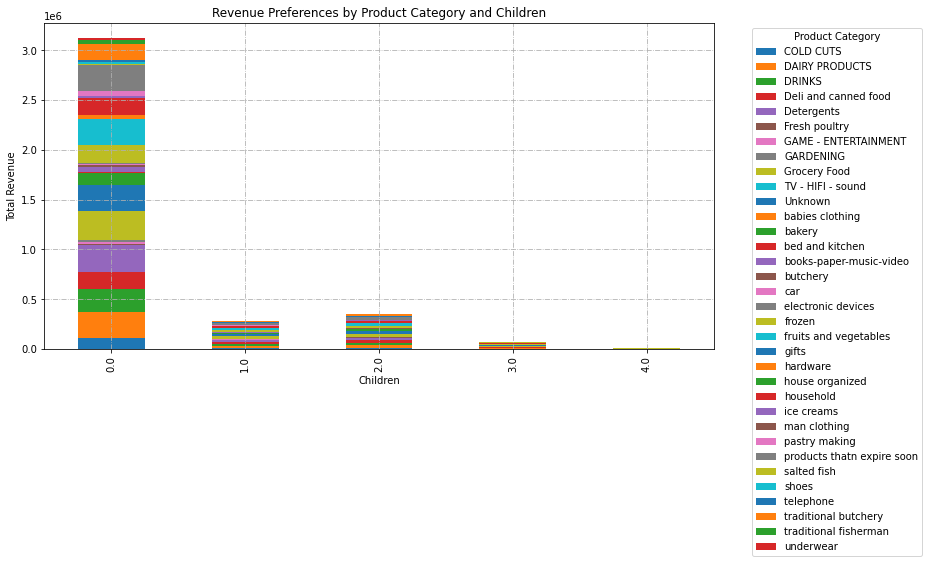

In [560]:
# Plot revenue preferences by Householdsize
children_category_revenue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue Preferences by Product Category and Children')
plt.xlabel('Children')
plt.grid(linestyle='-.')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [583]:
# Total Revenue Generated by Each Category of Children:

# Households with 0 children: Approx. 3,000,000 (dominates the graph in terms of revenue).
# Households with 1 child: Approx. 350,000.
# Households with 2 children: Approx. 400,000.
# Households with 3 children: Approx. 50,000.
# Households with 4 children: Approx. 10,000 (barely visible).
# Top Product Categories by Each Children Category:

# Households with 0 children:

# Grocery Food: Approx. 700,000.
# Fruits and Vegetables: Approx. 600,000.
# Dairy Products: Approx. 500,000.
# Drinks: Approx. 450,000.
# Households with 1 child:

# Grocery Food: Approx. 100,000.
# Fruits and Vegetables: Approx. 90,000.
# Dairy Products: Approx. 80,000.
# Drinks: Approx. 70,000.
# Households with 2 children:

# Grocery Food: Approx. 120,000.
# Fruits and Vegetables: Approx. 100,000.
# Dairy Products: Approx. 90,000.
# Drinks: Approx. 80,000.
# Households with 3 children:

# Grocery Food: Approx. 15,000.
# Fruits and Vegetables: Approx. 12,000.
# Dairy Products: Approx. 10,000.
# Households with 4 children:

# Grocery Food: Approx. 4,000.
# Fruits and Vegetables: Approx. 3,000.
# Key Observations:

# Households without children generate the highest revenue, likely indicating that these households may have a broader range of 
# shopping habits or higher purchasing power.
# Grocery Food, Fruits and Vegetables, Dairy Products, and Drinks consistently rank as the top categories across all household
# types.
# As the number of children increases, the revenue contribution reduces significantly, suggesting that households with more 
# children may spend less or purchase specific items.
# Insights and Implications:

# Marketing efforts can target households without children for a broader range of products.
# Households with children, particularly with 1 or 2 children, can be targeted with family-oriented products like Dairy 
#Products,
# Drinks, and Fruits and Vegetables.
# Understanding the spending patterns of households with more children can open opportunities to introduce more cost-effective
# or bundled product offerings.

#### Individual mission:--

#### Individual Product category Mission (Grocery Food )

#### Step 1: Revenue Contribution of Grocery Food to Overall Sales

In [585]:
full_data2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Year,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,4,15,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12,10.0,12.0,281.0,1.0,Detergents,laundry,wash,2013,4,17,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,2013,3,13,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,OTHER VEGETABLES,2013,4,24,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",gloves,2013,5,1,Wednesday


In [586]:
full_data2.shape

(236086, 17)

In [587]:
# Step 1.1: Filter Grocery Food category
grocery_data = full_data2[full_data2['CategoryBDescription'] == 'Grocery Food']

In [600]:
grocery_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday
9,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday
11,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday
23,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday


In [589]:
grocery_data.shape

(76643, 17)

In [595]:
grocery_data.isnull().sum()[grocery_data.isnull().sum()>0]

Series([], dtype: int64)

In [591]:
28347/76643

0.36985765170987567

In [594]:
grocery_data.Card_ID.fillna('Unknown',inplace=True)

In [597]:
grocery_data.drop(columns=['Year'], inplace=True)

In [599]:
# Step 1: Convert Card_ID in rfm_metrics to string and remove the decimal part
grocery_data['Card_ID'] = grocery_data['Card_ID'].astype(str).str.split('.').str[0]

#### Step 1.2: Calculate total revenue for Grocery Food and overall revenue

In [601]:
grocery_revenue = grocery_data['Sum_Value'].sum()

In [602]:
total_revenue = full_data2['Sum_Value'].sum()

In [603]:
grocery_contribution = (grocery_revenue / total_revenue) * 100

In [604]:
print(f"Grocery Food Revenue: ${grocery_revenue:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Grocery Food Contribution to Total Revenue: {grocery_contribution:.2f}%")

Grocery Food Revenue: $136,311.25
Total Revenue: $570,581.10
Grocery Food Contribution to Total Revenue: 23.89%


In [606]:
# Step 1.3: Plot revenue contributions
category_revenue4 = full_data2.groupby('CategoryBDescription')['Sum_Value'].sum().sort_values(ascending=False)
category_revenue_percentage = (category_revenue4 / total_revenue) * 100

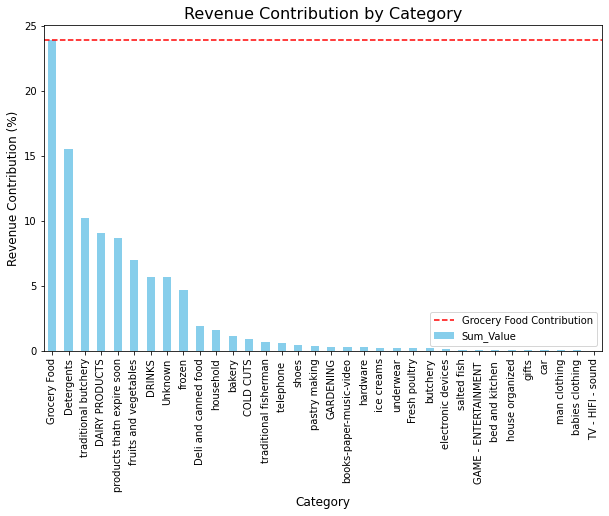

In [608]:
# Visualize category contributions
plt.figure(figsize=(10, 6))
category_revenue_percentage.plot(kind='bar', color='skyblue')
plt.title('Revenue Contribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue Contribution (%)', fontsize=12)
plt.xticks(rotation=90)
plt.axhline(y=grocery_contribution, color='red', linestyle='--', label='Grocery Food Contribution')
plt.legend()
plt.show()

#### Step 2: Customer Demographics for Grocery Food:--

In [609]:
# Goal:
# Analyze the demographics of customers who buy Grocery Food, including:

# Gender distribution.
# Marital Status.
# Household Size.
# Children.

In [610]:
grocery_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday
9,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday
11,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday
23,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday


In [612]:
rfm_demographics3.head()

,Card_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Card_ID_Length,Age,Gender,HouseholdSize,Children,Age_Group
0,9160000047700,2,36,195.709229,4,3,4,434,11,15,48.0,Male,1.0,0.0,36-50
1,9160000072177,1,21,225.614207,4,3,4,434,11,15,38.0,Male,2.0,1.0,36-50
2,9160000108180,7,2,147.894409,3,1,4,314,8,15,42.0,Male,5.0,2.0,36-50
3,9160000137227,32,41,129.671166,1,3,4,134,8,15,35.0,Female,4.0,2.0,18-35
4,9160000168443,2,17,38.923346,4,2,2,422,8,15,40.0,Male,3.0,0.0,36-50


In [613]:
rfm_demographics3.shape

(4399, 15)

In [618]:
loyalty_df2.head(2)

,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children,Card_ID_Length
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0,13
1,9164011076155,72.0,Female,Unknown,2.0,0.0,13


In [619]:
loyalty_df2.shape

(191128, 7)

In [614]:
# Step 2.1: Filter Grocery Food data and merge with demographics
grocery_demographics = pd.merge(grocery_data, rfm_demographics3[['Card_ID', 'Gender', 'HouseholdSize', 'Children']], on='Card_ID', how='left')


In [620]:
grocery_demographics2 = pd.merge(grocery_data, loyalty_df2[['Card_ID', 'Gender', 'HouseholdSize', 'Children','Age']], on='Card_ID', how='left')


In [660]:
grocery_demographics2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Gender,HouseholdSize,Children,Age,Age_Group
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,Female,2.0,0.0,54.0,51-65
1,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,Female,1.0,0.0,48.0,36-50
2,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday,Unknown,1.0,0.0,48.0,36-50
3,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday,Female,1.0,0.0,48.0,36-50
4,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday,Unknown,1.0,0.0,48.0,36-50


In [659]:
# Create age groups
grocery_demographics2['Age_Group'] = pd.cut(grocery_demographics2['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Under 18', '18-35', '36-50', '51-65', '65+'])


In [622]:
grocery_demographics2.shape

(76643, 20)

In [651]:
grocery_demographics2.isnull().sum()[grocery_demographics2.isnull().sum()>0]

Series([], dtype: int64)

In [632]:
grocery_demographics2['Gender'].value_counts()

Unknown    36038
Female     28627
Male       11978
Name: Gender, dtype: int64

In [628]:
grocery_demographics2['Gender'].fillna('Unknown', inplace=True)

In [631]:
grocery_demographics2.Gender.replace({'Fake Names' : 'Female'},inplace=True)

In [637]:
grocery_demographics2['HouseholdSize'].value_counts()

1.0     55792
0.0      5748
4.0      5129
3.0      4884
2.0      3508
5.0       962
6.0       440
7.0       104
8.0        44
10.0       12
12.0        8
9.0         7
22.0        2
20.0        2
23.0        1
Name: HouseholdSize, dtype: int64

In [ ]:
# Step 1: Convert Card_ID in rfm_metrics to string and remove the decimal part
grocery_data['Card_ID'] = grocery_data['Card_ID'].astype(str).str.split('.').str[0]

In [636]:
grocery_demographics2['HouseholdSize'].fillna(1, inplace=True)

In [646]:
grocery_demographics2['Children'].value_counts()

0.0    67661
2.0     4411
1.0     3535
3.0      905
4.0      131
Name: Children, dtype: int64

In [645]:
grocery_demographics2['Children'].fillna(0, inplace=True)

In [650]:
grocery_demographics2['Age'].fillna(grocery_demographics2['Age'].median(), inplace=True)

In [615]:
grocery_demographics.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Gender,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,Female,2.0,0.0
1,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,Female,1.0,0.0
2,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday,NaN,NaN,NaN
3,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday,Female,1.0,0.0
4,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday,NaN,NaN,NaN


In [616]:
grocery_demographics.shape

(76643, 19)

In [617]:
grocery_demographics.isnull().sum()[grocery_demographics.isnull().sum()>0]

Gender           28347
HouseholdSize    28347
Children         28347
dtype: int64

In [626]:
76643-28347

48296

In [624]:
category_preferences3new.head()

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment,Monetary,Age
0,9160000047700,DAIRY PRODUCTS,2.831137,36-50,Male,1.0,0.0,434,195.709229,48.0
1,9160000047700,Detergents,1.100015,36-50,Male,1.0,0.0,434,195.709229,48.0
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434,195.709229,48.0
3,9160000047700,Unknown,16.239502,36-50,Male,1.0,0.0,434,195.709229,48.0
4,9160000047700,books-paper-music-video,2.280000,36-50,Male,1.0,0.0,434,195.709229,48.0


In [625]:
category_preferences3new[category_preferences3new['CategoryBDescription']=='Grocery Food']

,Card_ID,CategoryBDescription,Sum_Value,Age_Group,Gender,HouseholdSize,Children,RFM_Segment,Monetary,Age
2,9160000047700,Grocery Food,26.270169,36-50,Male,1.0,0.0,434,195.709229,48.0
13,9160000072177,Grocery Food,8.670022,36-50,Male,2.0,1.0,434,225.614207,38.0
23,9160000137227,Grocery Food,39.610067,18-35,Female,4.0,2.0,134,129.671166,35.0
31,9160000168443,Grocery Food,11.170007,36-50,Male,3.0,0.0,422,38.923346,40.0
41,9160000207388,Grocery Food,55.020103,36-50,Female,2.0,0.0,344,165.843991,45.0
...,...,...,...,...,...,...,...,...,...,...
30320,9164017396523,Grocery Food,1.940015,36-50,Unknown,0.0,0.0,211,16.121908,48.0
30325,9164017396806,Grocery Food,11.960059,36-50,Unknown,0.0,0.0,222,18.910081,48.0
30327,9164017628372,Grocery Food,3.830022,36-50,Unknown,0.0,0.0,421,12.959589,48.0
30336,9164017704649,Grocery Food,11.880000,36-50,Unknown,0.0,0.0,311,16.340015,48.0


#### Step 2.2: Analyze gender distribution

In [653]:
gender_distribution = grocery_demographics['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_distribution)

Gender Distribution:
 Female        59.224366
Male          24.801226
Unknown       15.924714
Fake Names     0.049694
Name: Gender, dtype: float64


In [654]:
gender_distribution2 = grocery_demographics2['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_distribution2)

Gender Distribution:
 Unknown    47.020602
Female     37.351095
Male       15.628303
Name: Gender, dtype: float64


In [655]:
# Step 2.3: Analyze household size
household_size_distribution = grocery_demographics['HouseholdSize'].value_counts(normalize=True) * 100
print("Household Size Distribution:\n", household_size_distribution)

Household Size Distribution:
 1.0     56.826652
0.0     11.901607
4.0     10.619927
3.0     10.112639
2.0      7.263541
5.0      1.991883
6.0      0.911049
7.0      0.215339
8.0      0.091105
10.0     0.024847
12.0     0.016565
9.0      0.014494
22.0     0.004141
20.0     0.004141
23.0     0.002071
Name: HouseholdSize, dtype: float64


In [656]:
# Step 2.3: Analyze household size
household_size_distribution2 = grocery_demographics2['HouseholdSize'].value_counts(normalize=True) * 100
print("Household Size Distribution:\n", household_size_distribution2)


Household Size Distribution:
 1.0     72.794645
0.0      7.499706
4.0      6.692066
3.0      6.372402
2.0      4.577065
5.0      1.255170
6.0      0.574090
7.0      0.135694
8.0      0.057409
10.0     0.015657
12.0     0.010438
9.0      0.009133
22.0     0.002610
20.0     0.002610
23.0     0.001305
Name: HouseholdSize, dtype: float64


#### # Step 2.4: Analyze children categories

In [657]:
children_distribution = grocery_demographics['Children'].value_counts(normalize=True) * 100
print("Children Distribution:\n", children_distribution)

Children Distribution:
 0.0    88.280730
2.0     5.755255
1.0     4.612293
3.0     1.180799
4.0     0.170922
Name: Children, dtype: float64


In [658]:
children_distribution2 = grocery_demographics2['Children'].value_counts(normalize=True) * 100
print("Children Distribution:\n", children_distribution2)

Children Distribution:
 0.0    88.280730
2.0     5.755255
1.0     4.612293
3.0     1.180799
4.0     0.170922
Name: Children, dtype: float64


In [663]:
age_distribution = grocery_demographics2['Age_Group'].value_counts(normalize=True) * 100
print("age Distribution:\n", age_distribution)

age Distribution:
 36-50       83.665827
51-65        6.632047
18-35        5.302506
65+          4.376134
Under 18     0.023486
Name: Age_Group, dtype: float64


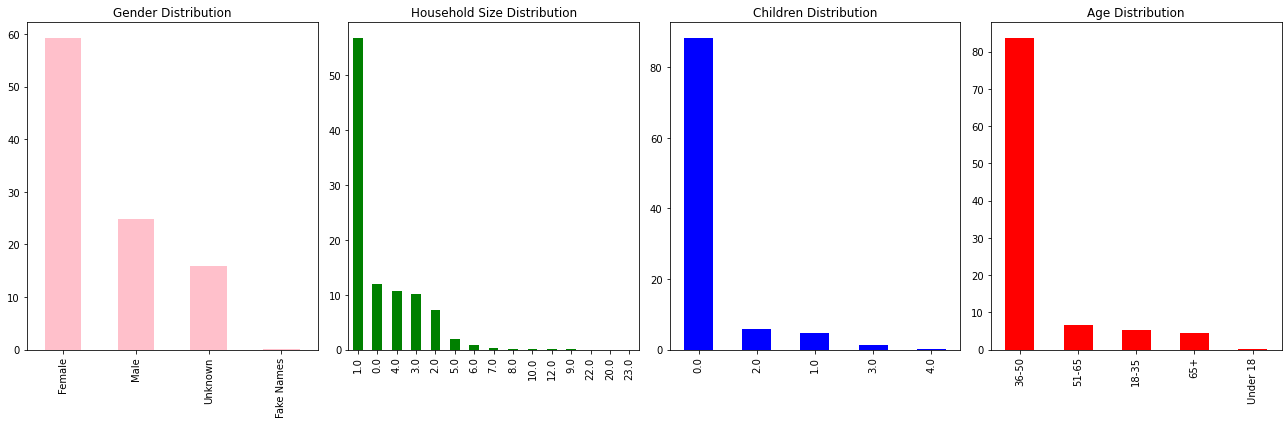

In [669]:
#Step 2.5: Visualize demographics
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Gender Distribution
gender_distribution.plot(kind='bar', ax=axes[0], color='pink', title='Gender Distribution')

# Household Size
household_size_distribution.plot(kind='bar', ax=axes[1], color='green', title='Household Size Distribution')

# Children
children_distribution.plot(kind='bar', ax=axes[2], color='blue', title='Children Distribution')
# Age 
age_distribution.plot(kind='bar', ax=axes[3], color='red', title='Age Distribution')

plt.tight_layout()
plt.show()

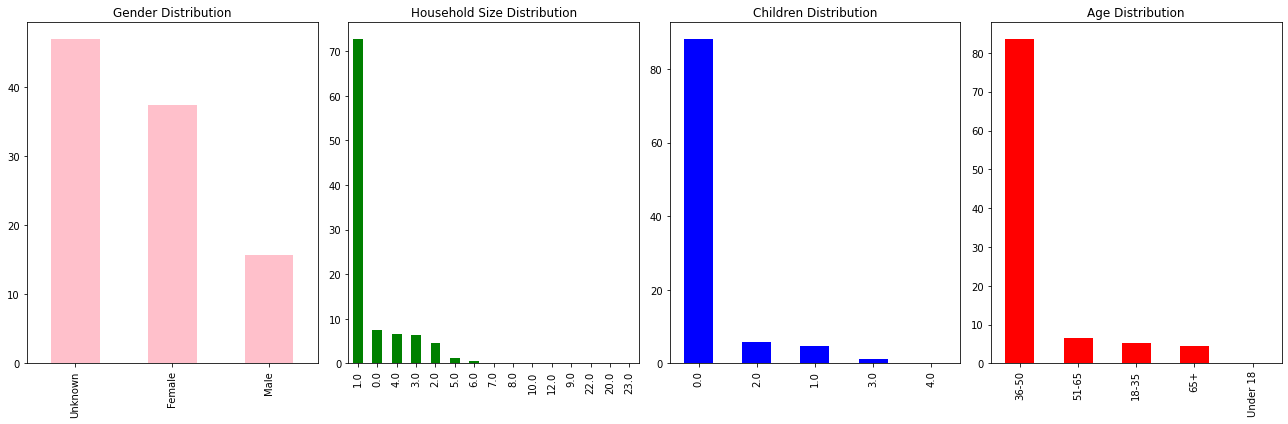

In [667]:
#Step 2.5: Visualize demographics
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Gender Distribution
gender_distribution2.plot(kind='bar', ax=axes[0], color='pink', title='Gender Distribution')

# Household Size
household_size_distribution2.plot(kind='bar', ax=axes[1], color='green', title='Household Size Distribution')

# Children
children_distribution2.plot(kind='bar', ax=axes[2], color='blue', title='Children Distribution')

age_distribution.plot(kind='bar', ax=axes[3], color='red', title='Age Distribution')

plt.tight_layout()
plt.show()

#### Step 3: Weekly and Peak Day Analysis for Grocery Food

#### Goal:
####Identify the weekly trends in Grocery Food sales and determine the peak sales day

In [676]:
grocery_demographics2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Gender,HouseholdSize,Children,Age,Age_Group,Weekday
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,Female,2.0,0.0,54.0,51-65,Monday
1,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,Female,1.0,0.0,48.0,36-50,Wednesday
2,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday,Unknown,1.0,0.0,48.0,36-50,Friday
3,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday,Female,1.0,0.0,48.0,36-50,Monday
4,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday,Unknown,1.0,0.0,48.0,36-50,Friday


In [673]:
grocery_demographics2.shape

(76643, 21)

In [677]:
grocery_demographics2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76643 entries, 0 to 76642
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Basket_ID             76643 non-null  int64         
 1   Date                  76643 non-null  datetime64[ns]
 2   Barcode               76643 non-null  int64         
 3   Sum_Units             76643 non-null  int64         
 4   Sum_Value             76643 non-null  float64       
 5   Card_ID               76643 non-null  object        
 6   CategoryA             76643 non-null  float64       
 7   CategoryB             76643 non-null  float64       
 8   CategoryC             76643 non-null  float64       
 9   CategoryD             76643 non-null  float64       
 10  CategoryBDescription  76643 non-null  object        
 11  CategoryCDescription  76643 non-null  object        
 12  CategoryDDescription  76643 non-null  object        
 13  Month           

In [675]:
grocery_demographics2['Weekday'] = pd.to_datetime(grocery_demographics2['Date']).dt.day_name()

In [678]:
# Step 3.2: Group data by weekday
weekday_sales = grocery_demographics2.groupby('Weekday')['Sum_Value'].sum()

In [682]:
# Step 3.3: Sort weekdays for proper order
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [683]:
# Step 3.4: Identify the peak day
peak_day = weekday_sales.idxmax()
peak_revenue = weekday_sales.max()
print(f"Peak Sales Day: {peak_day} with Revenue: ${peak_revenue:,.2f}")

Peak Sales Day: Saturday with Revenue: $27,658.53


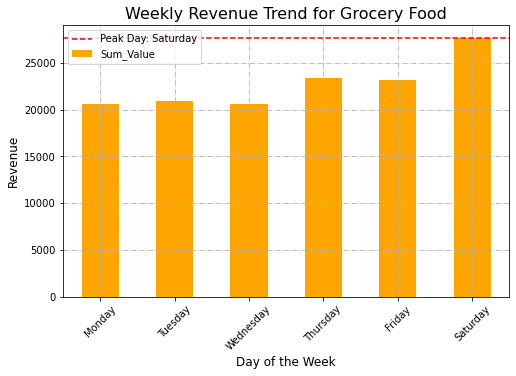

In [686]:
# Step 3.5: Visualize weekly sales
plt.figure(figsize=(8, 5))
weekday_sales.plot(kind='bar', color='orange')
plt.title('Weekly Revenue Trend for Grocery Food', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(linestyle='-.')
plt.xticks(rotation=45)
plt.axhline(y=peak_revenue, color='red', linestyle='--', label=f'Peak Day: {peak_day}')
plt.legend()
plt.show()

#### Step 4: Top 10 Selling Products under Grocery Food

In [685]:
# Goal:
# Identify the top 10 products within Grocery Food and their weekly revenues

In [689]:
grocery_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday
9,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday
11,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday
23,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday


In [690]:
grocery_data.isnull().sum()[grocery_data.isnull().sum()>0]

Series([], dtype: int64)

In [691]:
# Step 4.1: Identify top 10 products
top_products = grocery_data.groupby('CategoryDDescription')['Sum_Value'].sum().sort_values(ascending=False).head(10)

In [692]:
top_products

CategoryDDescription
no sugar            7396.843376
LIMITED DURATION    6567.767600
OLIVE OIL           6463.782344
instant coffee      5579.704022
poweder             4825.813965
greek coffe         4704.922729
tomato              3568.620383
dried fruits        3391.142147
tray meals          3300.311200
americano           2868.502639
Name: Sum_Value, dtype: float64

In [693]:
grocery_demographics2.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week,Gender,HouseholdSize,Children,Age,Age_Group,Weekday
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday,Female,2.0,0.0,54.0,51-65,Monday
1,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday,Female,1.0,0.0,48.0,36-50,Wednesday
2,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday,Unknown,1.0,0.0,48.0,36-50,Friday
3,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday,Female,1.0,0.0,48.0,36-50,Monday
4,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday,Unknown,1.0,0.0,48.0,36-50,Friday


In [694]:
grocery_demographics2.isnull().sum()[grocery_demographics2.isnull().sum()>0]

Series([], dtype: int64)

In [695]:
# Step 4.1: Identify top 10 products
top_products2 = grocery_demographics2.groupby('CategoryDDescription')['Sum_Value'].sum().sort_values(ascending=False).head(10)

In [696]:
top_products2

CategoryDDescription
no sugar            7396.843376
LIMITED DURATION    6567.767600
OLIVE OIL           6463.782344
instant coffee      5579.704022
poweder             4825.813965
greek coffe         4704.922729
tomato              3568.620383
dried fruits        3391.142147
tray meals          3300.311200
americano           2868.502639
Name: Sum_Value, dtype: float64

In [699]:
# Step 4.2: Weekly revenue for top products
weekly_revenue = grocery_data[grocery_data['CategoryDDescription'].isin(top_products.index)].groupby(['CategoryDDescription', 'Day_of_Week'])['Sum_Value'].sum().unstack()


In [700]:
print("Weekly Revenue for Top Products:\n", weekly_revenue)

Weekly Revenue for Top Products:
 Day_of_Week                Friday       Monday     Saturday     Thursday  \
CategoryDDescription                                                       
LIMITED DURATION       940.410710  1109.221130  1350.672340  1085.690889   
OLIVE OIL             1319.110494   763.510377  1595.680587  1129.400382   
americano              508.240616   364.070319   698.750700   551.450305   
dried fruits           570.340336   413.020397   773.250886   630.870340   
greek coffe            985.312352   601.771807   969.232320   821.572365   
instant coffee        1102.810866   847.620373  1155.651310   890.650337   
no sugar              1478.222487   970.501781  1834.802996  1178.462132   
poweder                846.634539   651.363405  1118.665883   820.003609   
tomato                 532.913336   588.473305   724.714157   573.473366   
tray meals             525.690185   532.190169   583.250244   595.100158   

Day_of_Week               Tuesday   Wednesday  
Categ

In [701]:
weekly_revenue

Day_of_Week,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
CategoryDDescription,,,,,,
LIMITED DURATION,940.410710,1109.221130,1350.672340,1085.690889,1116.061482,965.711049
OLIVE OIL,1319.110494,763.510377,1595.680587,1129.400382,879.670231,776.410273
americano,508.240616,364.070319,698.750700,551.450305,391.700339,354.290361
dried fruits,570.340336,413.020397,773.250886,630.870340,435.700044,567.960144
greek coffe,985.312352,601.771807,969.232320,821.572365,721.712203,605.321681
instant coffee,1102.810866,847.620373,1155.651310,890.650337,855.010632,727.960503
no sugar,1478.222487,970.501781,1834.802996,1178.462132,987.442266,947.411714
poweder,846.634539,651.363405,1118.665883,820.003609,800.363255,588.783273
tomato,532.913336,588.473305,724.714157,573.473366,628.853408,520.192810


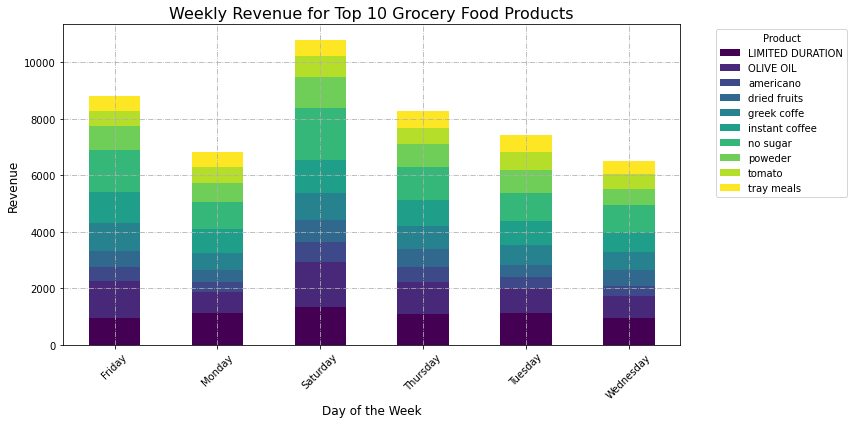

In [703]:
# Step 4.3: Visualize weekly revenue for top products
weekly_revenue.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Weekly Revenue for Top 10 Grocery Food Products', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='-.')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

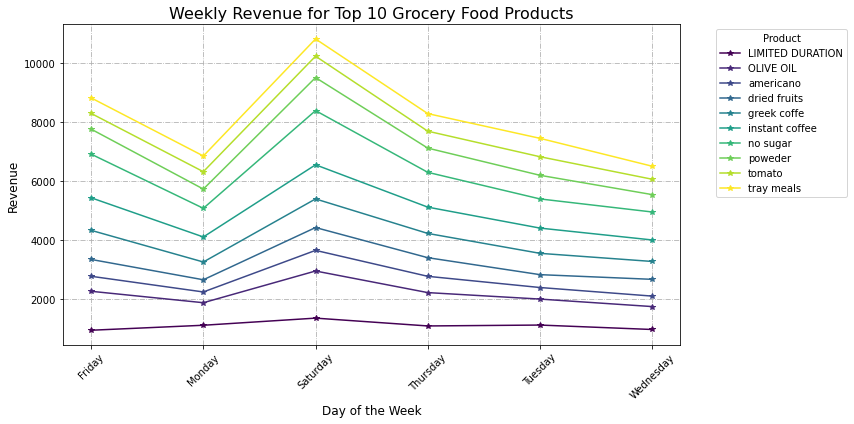

In [705]:

# Step 4.3: Visualize weekly revenue for top products
weekly_revenue.T.plot(kind='line', stacked=True, figsize=(12, 6), colormap='viridis', marker='*')
plt.title('Weekly Revenue for Top 10 Grocery Food Products', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='-.')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()






#### Identify Top 10 Selling Products under Grocery Food By Percentage :--

In [709]:
grocery_data.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Month,Day,Day_of_Week
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,4,15,Monday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,Grocery Food,pet,cat,3,13,Wednesday
9,1095466893,2013-03-22,520423930028,1,1.460015,Unknown,10.0,14.0,229.0,2.0,Grocery Food,crisps,oregano,3,22,Friday
11,1098440439,2013-04-01,520306400115,1,1.250007,9162008740232,10.0,14.0,203.0,7.0,Grocery Food,biscuits,classic cookies,4,1,Monday
23,1093500164,2013-03-15,520102452113,2,1.860015,Unknown,10.0,14.0,229.0,6.0,Grocery Food,crisps,sour cream,3,15,Friday


In [711]:
# Group by product and calculate total revenue
product_revenue2 = grocery_data.groupby('CategoryDDescription')['Sum_Value'].sum().reset_index()

In [712]:
# Rename columns for clarity
product_revenue2.columns = ['Product', 'Total_Revenue']

In [713]:
# Sort products by revenue in descending order and select the top 10
top_10_products = product_revenue2.sort_values(by='Total_Revenue', ascending=False).head(10)

In [714]:
top_10_products

,Product,Total_Revenue
91,no sugar,7396.843376
4,LIMITED DURATION,6567.767600
9,OLIVE OIL,6463.782344
67,instant coffee,5579.704022
105,poweder,4825.813965
62,greek coffe,4704.922729
130,tomato,3568.620383
53,dried fruits,3391.142147
132,tray meals,3300.311200
18,americano,2868.502639


In [715]:
# Calculate the total revenue for all products in the Grocery Food category
total_revenue = product_revenue2['Total_Revenue'].sum()


In [716]:
# Add a new column to the top 10 products dataframe for revenue contribution percentage
top_10_products['Revenue_Percentage'] = (top_10_products['Total_Revenue'] / total_revenue) * 100

In [717]:
top_10_products

,Product,Total_Revenue,Revenue_Percentage
91,no sugar,7396.843376,5.426436
4,LIMITED DURATION,6567.767600,4.818214
9,OLIVE OIL,6463.782344,4.741929
67,instant coffee,5579.704022,4.093355
105,poweder,4825.813965,3.540290
62,greek coffe,4704.922729,3.451603
130,tomato,3568.620383,2.617994
53,dried fruits,3391.142147,2.487793
132,tray meals,3300.311200,2.421158
18,americano,2868.502639,2.104377


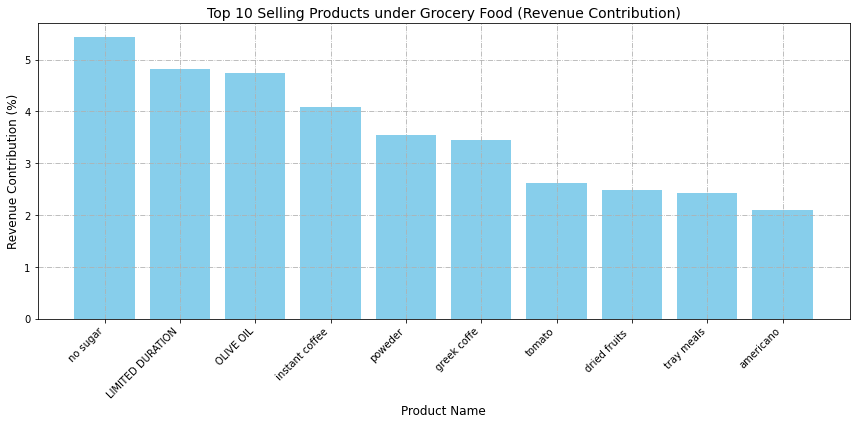

In [722]:
import matplotlib.pyplot as plt

# Plot the revenue contribution of the top 10 products
plt.figure(figsize=(12, 6))
plt.bar(top_10_products['Product'], top_10_products['Revenue_Percentage'], color='skyblue')
plt.title('Top 10 Selling Products under Grocery Food (Revenue Contribution)', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.grid(linestyle='-.')
plt.ylabel('Revenue Contribution (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



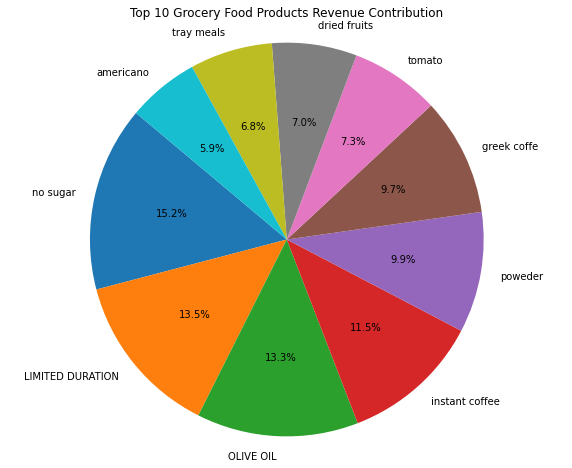

In [725]:
product_names = top_10_products['Product']
revenue_percentages = top_10_products['Revenue_Percentage']

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(revenue_percentages, labels=product_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Grocery Food Products Revenue Contribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

#### Step 5: Apriori Analysis and Product Recommendations

In [726]:
# Goal:
# Perform Apriori analysis to identify frequently purchased product combinations under Grocery Food

In [729]:
# Step 5.1: Prepare data for Apriori

grocery_basket = grocery_data.groupby(['Basket_ID', 'CategoryDDescription'])['Sum_Units'].sum().unstack().fillna(0)
grocery_basket = grocery_basket.applymap(lambda x: 1 if x > 0 else 0)




In [730]:
grocery_basket.head()

CategoryDDescription,BBQ,CLOVES,CRUTON,HERBS AND AROMATIC,LIMITED DURATION,LONG TERM,LUNCHEON MEAT,Mousse,NUTS,OLIVE OIL,SNACKS,SPICES,STICKS,Sweet & Savoury Base,Vegetable Fats,adult,africa,amarican,americano,asian,bars,basmati,beans,beens,bio,bio coffe,biscuits,black,black and fruits,black chocolate,boil bag,boiled sweets,brown rice,cake slices,cat,chewing gums,chocolate bags,chocolate bars,chocolate boxes and gifts,christmas,cinamon,classic cookies,cocoa,cookies,corn,cream,cream flour,crumpets,delicatesen,diet,dog,dried cat food,dried dog food,dried fruits,easter,european,exotics,familly,filter coffee,fish salads,fruit pots,garlic,greek coffe,green vegetables,halvah,herbal drinks,honey,instant coffee,instant drinks,instant drinks no sugar,italian spaghetti,jams (glass),jams (plastic),jars,jelly,ketchup,kids,kids sweets,lemon juice,lentiles,marmalade,mayonnaise,meat,mexican,milk,milk and black,mints,mix,muple syrup,mushrooms,mustard,no sugar,non cafeine,nuts,oregano,organic oil,pasta,pate,peas,peper,pickles,pies,pineapple,plain flour,pouches,poweder,rapeseed,salad cream,salt,sardines,sauces,savoury biscuits,self raising flour,semi-prepared,semolina,smashed potatoes,soups,sour cream,spaghetti,special,stock cubes,strong white flour,stuffed biscuits,sugar substitute,sunflower,sweet dough,sweetcorn,sweeteners,table sauces,tea,tomato,traditional,tray meals,tuna,various,various fruits,various vegetables,vergin olive oil,vinegar,wafers,white,wholemeal flour,with chocolate,with fruits,with sugar
Basket_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1089674689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1089674691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1089674692,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1089674702,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1089674704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [738]:
# Step 5.2: Apply Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_grocery_items = apriori(grocery_basket, min_support=0.01, use_colnames=True)


C:\Users\HARSH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [739]:
rules_grocery = association_rules(frequent_grocery_items, metric="lift", min_threshold=0.5)

In [740]:
print("Generated Rules:\n", rules_grocery[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Generated Rules:
                antecedents             consequents   support  confidence  \
0       (LIMITED DURATION)              (crumpets)  0.010051    0.081569   
1               (crumpets)      (LIMITED DURATION)  0.010051    0.161272   
2       (LIMITED DURATION)           (greek coffe)  0.011895    0.096528   
3            (greek coffe)      (LIMITED DURATION)  0.011895    0.155455   
4       (LIMITED DURATION)              (no sugar)  0.014921    0.121084   
5               (no sugar)      (LIMITED DURATION)  0.014921    0.151056   
6       (LIMITED DURATION)               (poweder)  0.012486    0.101327   
7                (poweder)      (LIMITED DURATION)  0.012486    0.111560   
8       (LIMITED DURATION)                (tomato)  0.014295    0.116003   
9                 (tomato)      (LIMITED DURATION)  0.014295    0.126813   
10  (Sweet & Savoury Base)               (poweder)  0.010886    0.267521   
11               (poweder)  (Sweet & Savoury Base)  0.010886    0.0972

In [741]:
rules_grocery

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LIMITED DURATION),(crumpets),0.123226,0.062326,0.010051,0.081569,1.308750,0.002371,1.020952,0.269069
1,(crumpets),(LIMITED DURATION),0.062326,0.123226,0.010051,0.161272,1.308750,0.002371,1.045362,0.251593
2,(LIMITED DURATION),(greek coffe),0.123226,0.076516,0.011895,0.096528,1.261538,0.002466,1.022150,0.236454
3,(greek coffe),(LIMITED DURATION),0.076516,0.123226,0.011895,0.155455,1.261538,0.002466,1.038161,0.224494
4,(LIMITED DURATION),(no sugar),0.123226,0.098776,0.014921,0.121084,1.225846,0.002749,1.025381,0.210130
5,(no sugar),(LIMITED DURATION),0.098776,0.123226,0.014921,0.151056,1.225846,0.002749,1.032782,0.204429
6,(LIMITED DURATION),(poweder),0.123226,0.111923,0.012486,0.101327,0.905327,-0.001306,0.988209,-0.106561
7,(poweder),(LIMITED DURATION),0.111923,0.123226,0.012486,0.111560,0.905327,-0.001306,0.986869,-0.105348
8,(LIMITED DURATION),(tomato),0.123226,0.112723,0.014295,0.116003,1.029105,0.000404,1.003711,0.032257
9,(tomato),(LIMITED DURATION),0.112723,0.123226,0.014295,0.126813,1.029105,0.000404,1.004107,0.031875


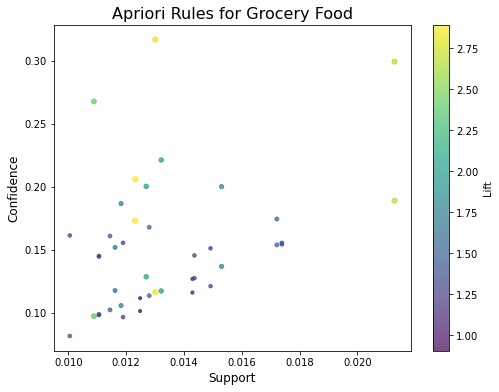

In [743]:
# Step 5.3: Visualize rules
plt.figure(figsize=(8, 6))
plt.scatter(rules_grocery['support'], rules_grocery['confidence'], s=rules_grocery['lift'] * 10, alpha=0.7, c=rules_grocery['lift'], cmap='viridis')
plt.title('Apriori Rules for Grocery Food', fontsize=16)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.colorbar(label='Lift')
plt.show()

---------------X------------------X--------End of Report -----------------X-------------------------X---------------------------

In [ ]:

# ### **How to Read the Rules:**

# Each row in the result represents an association rule of the form:
# - **Antecedents → Consequents**
#   - This means: "If someone buys the antecedent item(s), they are likely to buy the consequent item(s)."

# ---

# ### **Key Parameters:**
# 1. **Support**:  
#    - Proportion of transactions that contain both the antecedents and consequents.  
#    - **Example**: For `(LIMITED DURATION) → (crumpets)`, the **support** is `0.010051`.  
#      - This means 1.01% of all transactions contained both "LIMITED DURATION" and "crumpets."

# 2. **Confidence**:  
#    - The likelihood of buying the consequent item(s) given that the antecedent item(s) were purchased.  
#    - **Example**: For `(LIMITED DURATION) → (crumpets)`, the **confidence** is `0.081569`.  
#      - This means that 8.16% of customers who purchased "LIMITED DURATION" also bought "crumpets."

# 3. **Lift**:  
#    - A measure of how much more likely the consequent is purchased when the antecedent is purchased compared to random
#chance.  
#    - Lift > 1 indicates a positive association.  
#    - **Example**: For `(LIMITED DURATION) → (crumpets)`, the **lift** is `1.308750`.  
#      - This means that purchasing "LIMITED DURATION" makes buying "crumpets" 1.31 times more likely than random chance.

# 4. **Leverage**:  
#    - The difference in the observed co-occurrence of antecedents and consequents compared to what would be expected if 
# they were independent.  
#    - Positive leverage indicates a positive relationship.

# 5. **Conviction**:  
#    - Measures the implication strength. Conviction > 1 indicates a stronger rule.  
#    - **Example**: For `(LIMITED DURATION) → (crumpets)`, conviction is `1.020952`.  
#      - This means the rule is 1.02 times stronger than if it occurred randomly.

# 6. **Zhang’s Metric**:  
#    - Measures the relevance of a rule. Higher values indicate stronger relationships.

# ---

# ### **How to Interpret Rules:**

# #### Rule Example:  
# **(LIMITED DURATION) → (crumpets)**  
# - **Support**: 1.01% of transactions include both "LIMITED DURATION" and "crumpets."
# - **Confidence**: If "LIMITED DURATION" is purchased, there is an 8.16% chance "crumpets" will also be purchased.
# - **Lift**: The chance of buying "crumpets" increases by 1.31 times when "LIMITED DURATION" is bought compared to 
#     random chance.

# #### Rule Example:  
# **(pasta) → (spaghetti)**  
# - **Support**: 1.23% of transactions include both "pasta" and "spaghetti."
# - **Confidence**: If "pasta" is purchased, there is a 20.59% chance "spaghetti" will also be purchased.
# - **Lift**: The likelihood of buying "spaghetti" increases by 2.89 times when "pasta" is bought compared to random chance.

# ---

# ### **Key Observations from the Results:**

# 1. **Strong Rules**:
#    - `(pasta) → (spaghetti)`:
#      - High **lift** (2.89): Customers who buy "pasta" are almost 3 times more likely to buy "spaghetti."
#      - High **confidence** (20.59%): Indicates a strong relationship.
#    - `(Sweet & Savoury Base) → (poweder)`:
#      - High **lift** (2.39): Strong association between these two items.

# 2. **Weak Rules**:
#    - `(LIMITED DURATION) → (poweder)`:
#      - Lift is `0.90` (less than 1): This indicates a weak or negative association.
#      - Low **confidence**: Customers who buy "LIMITED DURATION" are not much more likely to buy "poweder" than random chance.

# 3. **Complementary Items**:
#    - **(no sugar) → (instant coffee)**:
#      - Lift of `2.02` indicates that customers who buy "no sugar" are twice as likely to buy "instant coffee."

# 4. **Redundant or Unhelpful Rules**:
#    - Rules with very low **confidence** or **lift** might not be useful for actionable insights.

# ---

# ### **Business Implications**:
# 1. **Cross-Selling Opportunities**:
#    - Pair "pasta" and "spaghetti" or "Sweet & Savoury Base" and "poweder" in combo offers or promotions to increase sales.
#    - For instance, a discount on "spaghetti" when "pasta" is purchased can boost revenue.

# 2. **Weak Associations**:
#    - Items with low lift or confidence (e.g., `(LIMITED DURATION) → (poweder)`) might not be worth grouping or
# promoting together.

# 3. **Frequent Combos**:
#    - Items like "no sugar" and "instant coffee" can be marketed together as complementary items.

# ---

# ### **Conclusion**:
# - Focus on rules with high **lift** and **confidence**, as these indicate strong associations.
# - Create combo offers or recommendations based on pairs like:
#   - "pasta" → "spaghetti"
#   - "no sugar" → "instant coffee"
#   - "Sweet & Savoury Base" → "poweder"
# - Avoid relying on weak associations with low lift or confidence.

